In [21]:
import numpy as np
from array import *
import csv
import datetime;
import matplotlib.pyplot as plt
import json
import os
import pandas as pd
from tqdm import tqdm

# Binary Search
from bisect import bisect_left
from bisect import bisect_right

import pickle


print('----------------------')
print('done!')



----------------------
done!


In [22]:
#BASE_ADDRESS = '/local/scratch/exported/blockchain_parsed/cardano_mostafa'
BASE_ADDRESS = '/local/scratch/exported/Cardano_MCH_2023_1/'
TEMP_ADDRESS = BASE_ADDRESS + '/temp_files/'


from matplotlib import font_manager
font_dirs = ['/home/user/chegeni/fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')


print('----------------------')
print('done!')


----------------------
done!


In [23]:
# Define required methods:


print('----------------------')

# ct stores current time
ct = datetime.datetime.now()
print("current time: ", ct)



##########################################################################################
def parent (id1, parents_array):
    return parents_array[id1];

##########################################################################################
def find_parent (id1, parents_array):
    while (id1 != parent(id1, parents_array)):
        new_parent = parent(parent(id1, parents_array), parents_array);
        id1        = new_parent;
    
    return id1

##########################################################################################
# Link two addresses based on "Union-Find" Algorithm:
def link_address (addr_position_1, addr_position_2, parents_array):
    id1 = find_parent(addr_position_1, parents_array)
    id2 = find_parent(addr_position_2, parents_array)

    if (id1 == id2):
        return

    # make sure always we have id1 > id2
    if id1 < id2:
        x = id1
        id1 = id2
        id2 = x

    parents_array[id1] = id2
    return

##########################################################################################
def resolveAll (parents_array):
    for id1 in tqdm(range(len(parents_array))):
        parents_array[id1] = find_parent(id1, parents_array);
    return

##########################################################################################
def remapClusterIds (parents_array, clustering_array):
    cluster_count = 0
    place_holder = 9999999999999
    new_cluster_ids = [place_holder] * len(parents_array)
    
    for i in range(len(clustering_array)):
        clustering_array[i] = parents_array[i]

    for i in tqdm(range(len(clustering_array))):
        parent_index = clustering_array[i]

        if (new_cluster_ids [parent_index] == place_holder):
            new_cluster_ids [parent_index] = cluster_count
            cluster_count = cluster_count + 1

        clustering_array[i] = new_cluster_ids [parent_index]

    return cluster_count;

##########################################################################################
def merge_parents(parents_array, parents_merged):
    if (len(parents_array) != len(parents_merged)):
        print('parents_merged Error: -1 (Length)')
        return -1
    
    for i in tqdm(range(len(parents_merged))):
        link_address (i, parents_array[i], parents_merged)


##########################################################################################
def BinarySearch(a, x):
    i = bisect_left(a, x)
    if i < len(a) and a[i] == x:
        return i
    else:
        print('BinarySearch Error: -1')
        return -1

##########################################################################################
def BinarySearch_Find_start_end(a, x):
    i = bisect_left(a, x)
    j = bisect_right(a, x) - 1
    if i < len(a) and a[i] == x and j < len(a) and a[j] == x:
        return [i, j]
    else:
        print('BinarySearch Error: -1')
        print('i = ', i)
        print('j = ', j)
        return -1


##########################################################################################
def store_array_to_file (input_array_name, file_name, index_=False, header_=None):
    ct = datetime.datetime.now()
    curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
    #print('start time (Store Array to ' + file_name + '): ', ct)

    df = pd.DataFrame(input_array_name)
    df.to_csv(file_name, index=index_, header=header_)

    '''
    with open(file_name, 'w') as filehandle:
        for element in input_array_name:
            filehandle.write(f'{element}\n')
    '''

    et = datetime.datetime.now() - ct
    #print('elapsed time (Store Array to ' + file_name + '): ', et)

    return

##########################################################################################
def load_file_to_array (file_name, header_=None):
    ct = datetime.datetime.now()
    curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
    #print('start time (Load ' + file_name  + ' to Array): ', ct)

    df = pd.read_csv(file_name, header=header_)
    output_array_name = df.to_numpy()
    
    '''
    output_array_name = []
    with open(file_name, 'r') as filehandle:
        for line in filehandle:
            # Remove linebreak which is the last character of the string
            curr_place = line[:-1]
            # Add item to the list
            output_array_name.append(curr_place)
    '''    

    '''
    for index, row in df.iterrows():
        new_line = df.loc[index , 0]
        output_array_name.append(new_line)
        if (index%1000000 == 0):
                print('One New Milion Records loaded: ', index)
    '''

    et = datetime.datetime.now() - ct
    #print('elapsed time (Load ' + file_name  + ' to Array): ', et)
    
    return output_array_name

##########################################################################################
def store_array_to_file_2D (input_array_name, file_name):
    ct = datetime.datetime.now()
    curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
    print('start time (Store Array 2D to ' + file_name + '): ', ct)

    with open(file_name, "w") as filehandle:
        json.dump(input_array_name, filehandle)
    
    et = datetime.datetime.now() - ct
    print('elapsed time (Store Array 2D to ' + file_name + '): ', et)

    return

##########################################################################################
def load_file_to_array_2D (file_name):
    ct = datetime.datetime.now()
    curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
    print('start time (Load ' + file_name  + ' to Array 2D): ', ct)

    with open(file_name) as filehandle:
        output_array_name = json.load(filehandle)

    et = datetime.datetime.now() - ct
    print('elapsed time (Load ' + file_name  + ' to Array 2D): ', et)
    
    return output_array_name


##########################################################################################
def store_dict_to_file_INT (input_dict_name, file_name):
    ct = datetime.datetime.now()
    curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
    print('start time (Store Dictionary to ' + file_name + '): ', ct)

    filehandle = csv.writer(open(file_name, 'w'))
    for key, val in input_dict_name.items():
        filehandle.writerow([key, val])

    et = datetime.datetime.now() - ct
    print('elapsed time (Store Dictionary to ' + file_name + '): ', et)

    return

##########################################################################################
def load_file_to_dict_INT (file_name):
    ct = datetime.datetime.now()
    curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
    print('start time (Load ' + file_name  + ' to Dictionary): ', ct)

    filehandle = csv.reader(open(file_name, 'r'))
    output_dict_name = {int(rows[0]):int(rows[1]) for rows in filehandle}

    et = datetime.datetime.now() - ct
    print('elapsed time (Load ' + file_name  + ' to Dictionary): ', et)
    
    return output_dict_name

##########################################################################################
def add_edge_info(node_1, node_2, edges_array, weight=1):
    if (node_1 == node_2):
        return

    # make sure always we have n1 > n2:
    if (node_1 < node_2):
        n1 = node_2
        n2 = node_1
    else:
        n1 = node_1
        n2 = node_2

    for i in range(weight):
        edges_array[n1].append(n2)

    return

##########################################################################################
def extract_payment_delegation_parts(address_raw, payment_cred, stake_address):
    if (address_raw == ''):
        #print(' - Error: address_raw is empty!')
        return ['', '']

    if (address_raw[2] == '8'): #Byron Address
        if (payment_cred != ''):
            print(' - Error: payment_cred in Byron Address is NOT empty!')
            return ['', '']
        if (stake_address != ''):
            print(' - Error: stake_address in Byron Address is NOT empty!')
            return ['', '']
        payment_part    = address_raw
        delegation_part = ''

    else: #Shelley Address
        if (payment_cred == ''):
            print(' - Error: payment_cred in Shelley Address is empty!')
            return ['', '']
        payment_part    = payment_cred
        delegation_part = stake_address

    return [payment_part, delegation_part]

##########################################################################################
# Function which calculates the Gini index
# Inputs: array with length equal to number of agents; each element in array represents the wealth of the agent
# Outputs: gini index of the system
def gini_index(inp_array):
    array = np.array(inp_array)
    array = array.astype(float)
    array = array.flatten() #all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0] #number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient

##########################################################################################



##########################################################################################
def Gini_rank(agent_reward):
    reward_values = np.sort(agent_reward)
    Mean = np.mean(reward_values)
    Amount_n = len(reward_values)
    sum_i = 0

    for i, xi in enumerate(reward_values):
        sum_i += (i+1) * (xi - Mean) 

    gini_index = (2 * sum_i) / (pow(Amount_n,2) * Mean)
    return gini_index


##########################################################################################
print('----------------------')
print('done!')


----------------------
current time:  2023-12-19 01:54:53.400017
----------------------
done!


In [24]:
# "Active/Rewarded Pools" per epoch:


print('----------------------')

# ct stores current time
ct = datetime.datetime.now()
print("current time: ", ct)
print('----------------------')



first_epoch_no = 210
last_epoch_no  = 391
FIRST_DATE_POOLS_STAKING = datetime.datetime.strptime('2020-08-08 21:44:51', '%Y-%m-%d %H:%M:%S').date() # epoch_no = 210
LAST_DATE_POOLS_STAKING  = datetime.datetime.strptime('2023-01-30 21:46:16', '%Y-%m-%d %H:%M:%S').date() # epoch_no = 391



#total_num_of_epochs = int(int((LAST_DATE_POOLS_STAKING - FIRST_DATE_POOLS_STAKING).total_seconds()/86400)/5) + 1
total_num_of_epochs = int(last_epoch_no - first_epoch_no + 1)

epochs_array      = list(range(first_epoch_no, last_epoch_no+1))
epochs_date_array = [0]*len(epochs_array)
for i in range(len(epochs_date_array)):
    epochs_date_array[i] = FIRST_DATE_POOLS_STAKING + datetime.timedelta(days=(i*5))


active_pools_per_epoch              = [set() for _ in range(total_num_of_epochs)]
cumulative_active_pools_per_epoch   = [set() for _ in range(total_num_of_epochs)]
rewarded_pools_per_epoch            = [set() for _ in range(total_num_of_epochs)]
cumulative_rewarded_pools_per_epoch = [set() for _ in range(total_num_of_epochs)]


gini_index_stakeOverActivePools_per_epoch   = [0]*total_num_of_epochs
gini_index_rewardOverRewardedPools_per_epoch = [0]*total_num_of_epochs
current_epoch = first_epoch_no
gini_stakes_array  = []
gini_rewards_array = []


file_name = BASE_ADDRESS + '/cardano_pools.csv'
df = pd.read_csv(file_name, delimiter=',')

for index, row in tqdm(df.iterrows()):
    ##########################################################################################
    EPOCH        = int( df.loc[index , 'EPOCH']        )
    POOL_ID      = int( df.loc[index , 'POOL_ID']      )
    POOL_STAKES  = int( df.loc[index , 'POOL_STAKES']  )
    POOL_REWARDS = int( df.loc[index , 'POOL_REWARDS'] )


    ##########################################################################################
    if(EPOCH < first_epoch_no):
        continue;
    ##########################################################################################
    if(EPOCH > current_epoch):
        gini_index_stakeOverActivePools_per_epoch    [current_epoch - first_epoch_no] = Gini_rank(gini_stakes_array)
        gini_index_rewardOverRewardedPools_per_epoch [current_epoch - first_epoch_no] = Gini_rank(gini_rewards_array)
        gini_stakes_array  = []
        gini_rewards_array = []
        current_epoch      = EPOCH
    ##########################################################################################
    if(EPOCH > last_epoch_no):
        break;
    ##########################################################################################

    if(POOL_STAKES > 0):
        gini_stakes_array.append(POOL_STAKES)

    if(POOL_STAKES > 0 and POOL_REWARDS >= 0):
        gini_rewards_array.append(POOL_REWARDS)

    ##########################################################################################
    if(POOL_STAKES > 0):
        active_pools_per_epoch[EPOCH - first_epoch_no].add(POOL_ID)

    ##########################################################################################
    if(POOL_REWARDS > 0):
        rewarded_pools_per_epoch[EPOCH - first_epoch_no].add(POOL_ID)

    ##########################################################################################


cumulative_active_pools_per_epoch[0] = active_pools_per_epoch[0]
for i in tqdm(range(1, total_num_of_epochs)):
    cumulative_active_pools_per_epoch[i] = cumulative_active_pools_per_epoch[i-1].union(active_pools_per_epoch[i])

cumulative_rewarded_pools_per_epoch[0] = rewarded_pools_per_epoch[0]
for i in tqdm(range(1, total_num_of_epochs)):
    cumulative_rewarded_pools_per_epoch[i] = cumulative_rewarded_pools_per_epoch[i-1].union(rewarded_pools_per_epoch[i])

    
count_active_pools_per_epoch              = [0]*len(active_pools_per_epoch)
count_cumulative_active_pools_per_epoch   = [0]*len(cumulative_active_pools_per_epoch)
count_rewarded_pools_per_epoch            = [0]*len(rewarded_pools_per_epoch)
count_cumulative_rewarded_pools_per_epoch = [0]*len(cumulative_rewarded_pools_per_epoch)
for i in tqdm(range(total_num_of_epochs)):
    count_active_pools_per_epoch[i]              = len(active_pools_per_epoch[i])
    count_cumulative_active_pools_per_epoch[i]   = len(cumulative_active_pools_per_epoch[i])
    count_rewarded_pools_per_epoch[i]            = len(rewarded_pools_per_epoch[i])
    count_cumulative_rewarded_pools_per_epoch[i] = len(cumulative_rewarded_pools_per_epoch[i])



et = datetime.datetime.now() - ct
print("Total elapsed time: ", et)
print('----------------------')
print('done!')




----------------------
current time:  2023-12-19 01:54:58.852579
----------------------


471282it [00:29, 16049.13it/s]
100%|██████████| 182/182 [00:00<00:00, 758056.93it/s]

Total elapsed time:  0:00:29.540075
----------------------
done!


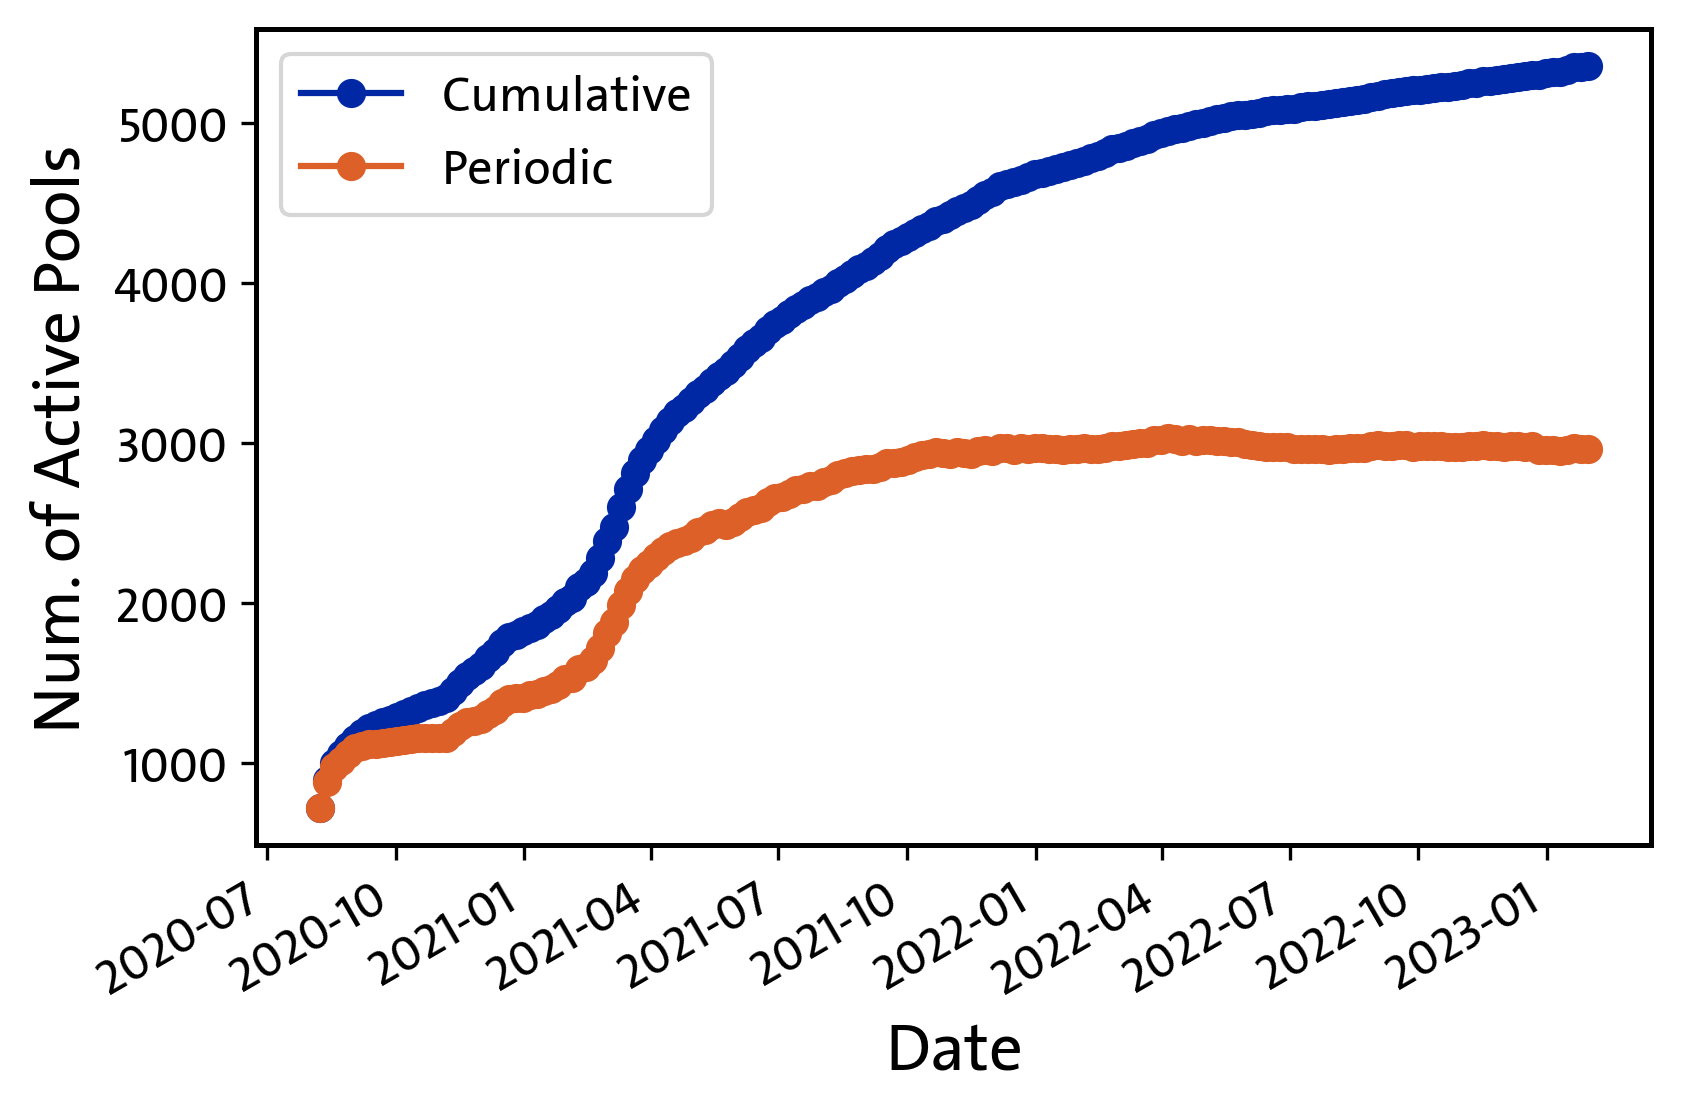

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')

#date_list = [str(INITIAL_DATE_CARDANO + datetime.timedelta(days=i)) for i in range(total_time_length_CARDANO)]
#date_list = pd.to_datetime(date_list)

date_list = [str(epochs_date_array[i]) for i in range(len(epochs_date_array))]
date_list = pd.to_datetime(date_list)

#date_list = epochs_date_array

DF = pd.DataFrame()
DF = pd.DataFrame(count_cumulative_active_pools_per_epoch, columns=['value1'])
DF['value2'] = pd.DataFrame(count_active_pools_per_epoch)

DF = DF.set_index(date_list)
plt.plot(DF, marker='o')
plt.gcf().autofmt_xdate()

# Function add a legend 
plt.legend(['Cumulative', 'Periodic'], loc ="upper left")

plt.xlabel('Date')
plt.ylabel('Num. of Active Pools')

# linear", "log", "symlog", "logit
#plt.xscale("linear")
#plt.yscale("log")

#plt.xlim(0, 60)
#plt.ylim(0, 60)


plt.savefig('fig_active_pools.pdf', bbox_inches='tight', facecolor='white')
plt.show()




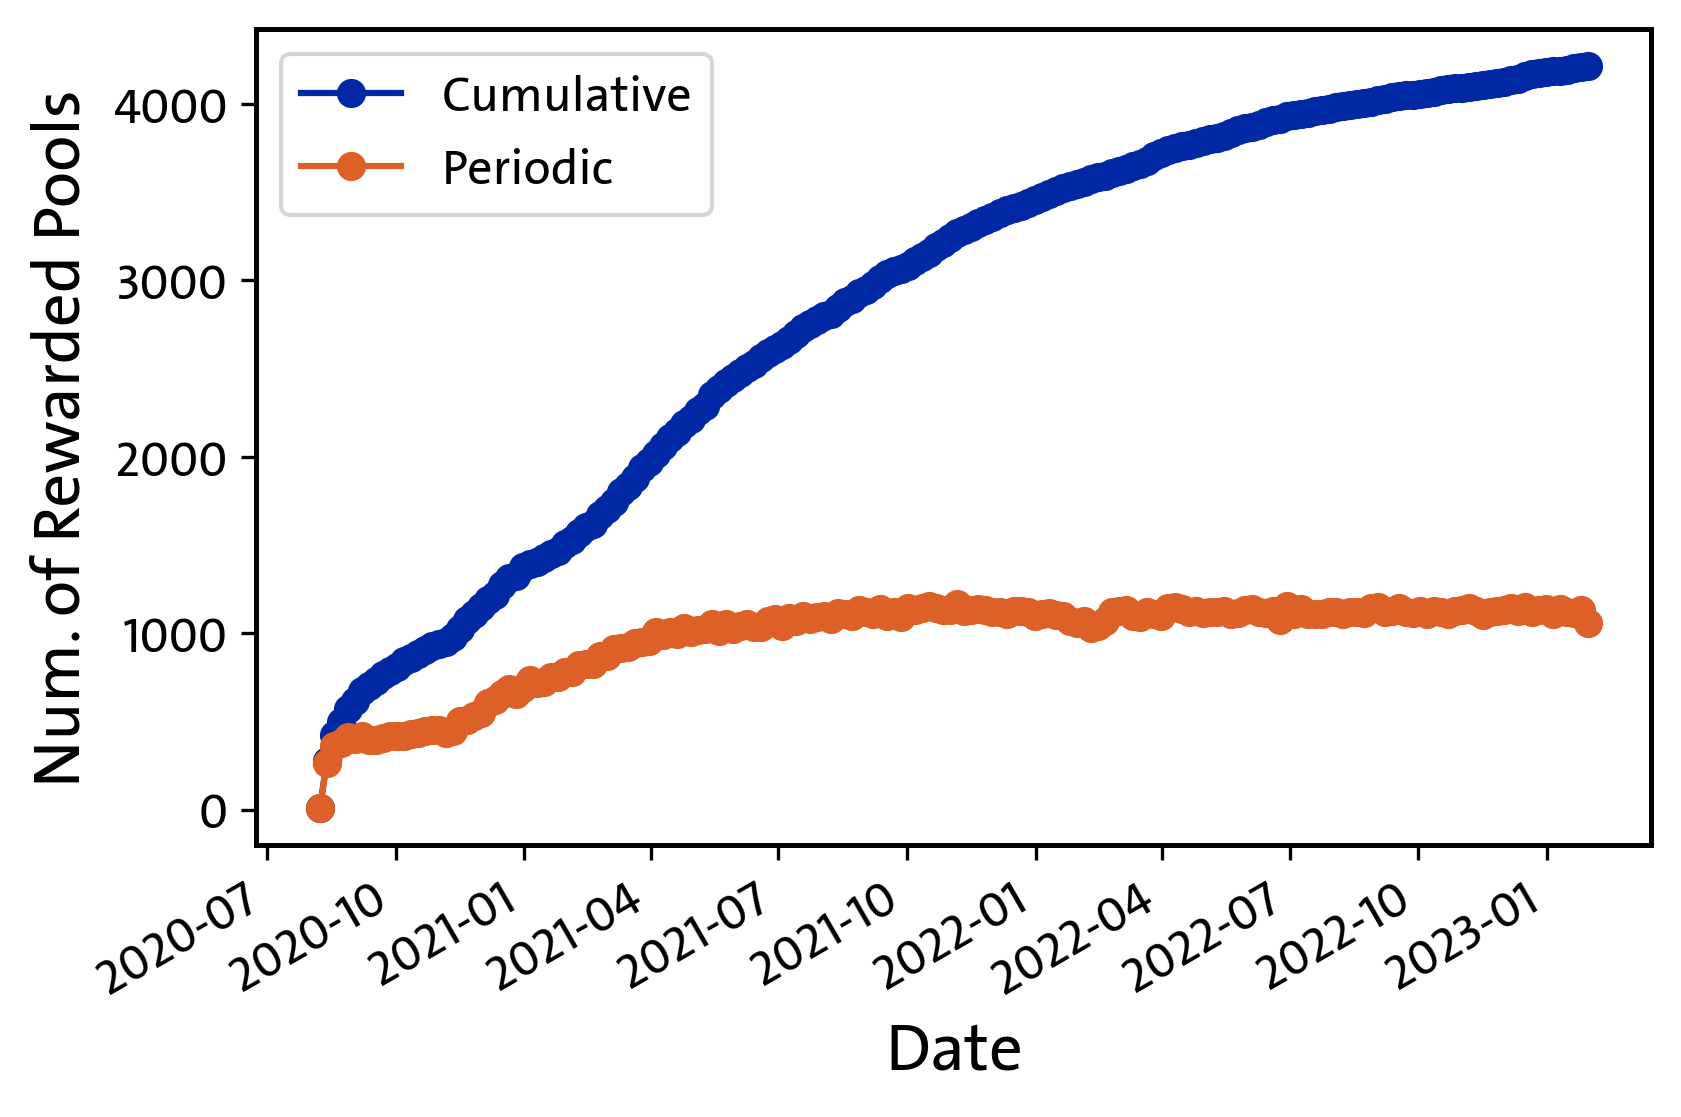

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')

#date_list = [str(INITIAL_DATE_CARDANO + datetime.timedelta(days=i)) for i in range(total_time_length_CARDANO)]
#date_list = pd.to_datetime(date_list)

date_list = [str(epochs_date_array[i]) for i in range(len(epochs_date_array))]
date_list = pd.to_datetime(date_list)

#date_list = epochs_date_array

DF = pd.DataFrame()
DF = pd.DataFrame(count_cumulative_rewarded_pools_per_epoch, columns=['value1'])
DF['value2'] = pd.DataFrame(count_rewarded_pools_per_epoch)

DF = DF.set_index(date_list)
plt.plot(DF, marker='o')
plt.gcf().autofmt_xdate()

# Function add a legend 
plt.legend(['Cumulative', 'Periodic'], loc ="upper left")

plt.xlabel('Date')
plt.ylabel('Num. of Rewarded Pools')

# linear", "log", "symlog", "logit
#plt.xscale("linear")
#plt.yscale("log")

#plt.xlim(0, 60)
#plt.ylim(0, 60)


plt.savefig('fig_rewarded_pools.pdf', bbox_inches='tight', facecolor='white')
plt.show()




In [45]:
count_cumulative_rewarded_pools_per_epoch[-1]

4214

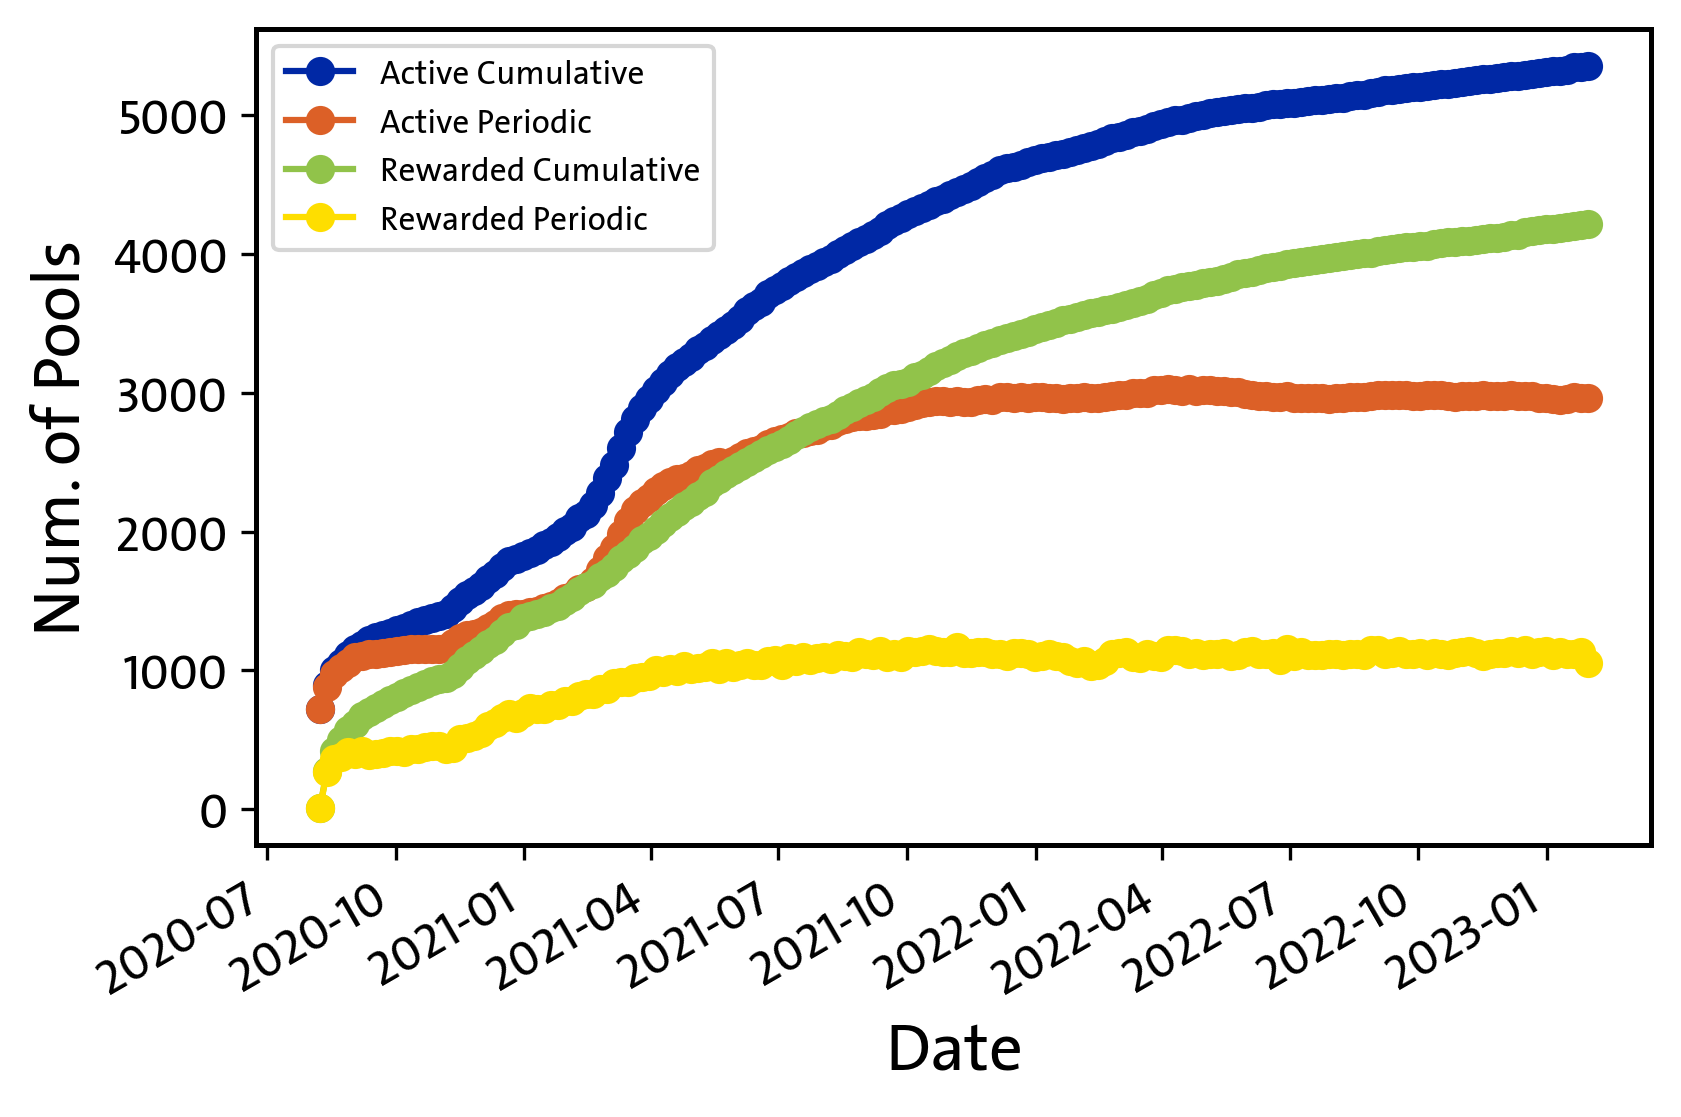

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')

#date_list = [str(INITIAL_DATE_CARDANO + datetime.timedelta(days=i)) for i in range(total_time_length_CARDANO)]
#date_list = pd.to_datetime(date_list)

date_list = [str(epochs_date_array[i]) for i in range(len(epochs_date_array))]
date_list = pd.to_datetime(date_list)

#date_list = epochs_date_array

DF = pd.DataFrame()
DF = pd.DataFrame(count_cumulative_active_pools_per_epoch, columns=['value1'])
DF['value2'] = pd.DataFrame(count_active_pools_per_epoch)
DF['value3'] = pd.DataFrame(count_cumulative_rewarded_pools_per_epoch)
DF['value4'] = pd.DataFrame(count_rewarded_pools_per_epoch)

DF = DF.set_index(date_list)
plt.plot(DF, marker='o')
plt.gcf().autofmt_xdate()

# Function add a legend 
plt.legend(['Active Cumulative', 'Active Periodic', 'Rewarded Cumulative', 'Rewarded Periodic'], fontsize="8", loc ="upper left")
#plt.legend(['Active Pools', 'Rewarded Pools'], loc ="lower right")

plt.xlabel('Date')
plt.ylabel('Num. of Pools')

# linear", "log", "symlog", "logit
#plt.xscale("linear")
#plt.yscale("log")

#plt.xlim(0, 60)
#plt.ylim(0, 60)


plt.savefig('fig_numOf_active_and_rewarded_pools.pdf', bbox_inches='tight', facecolor='white')
plt.show()




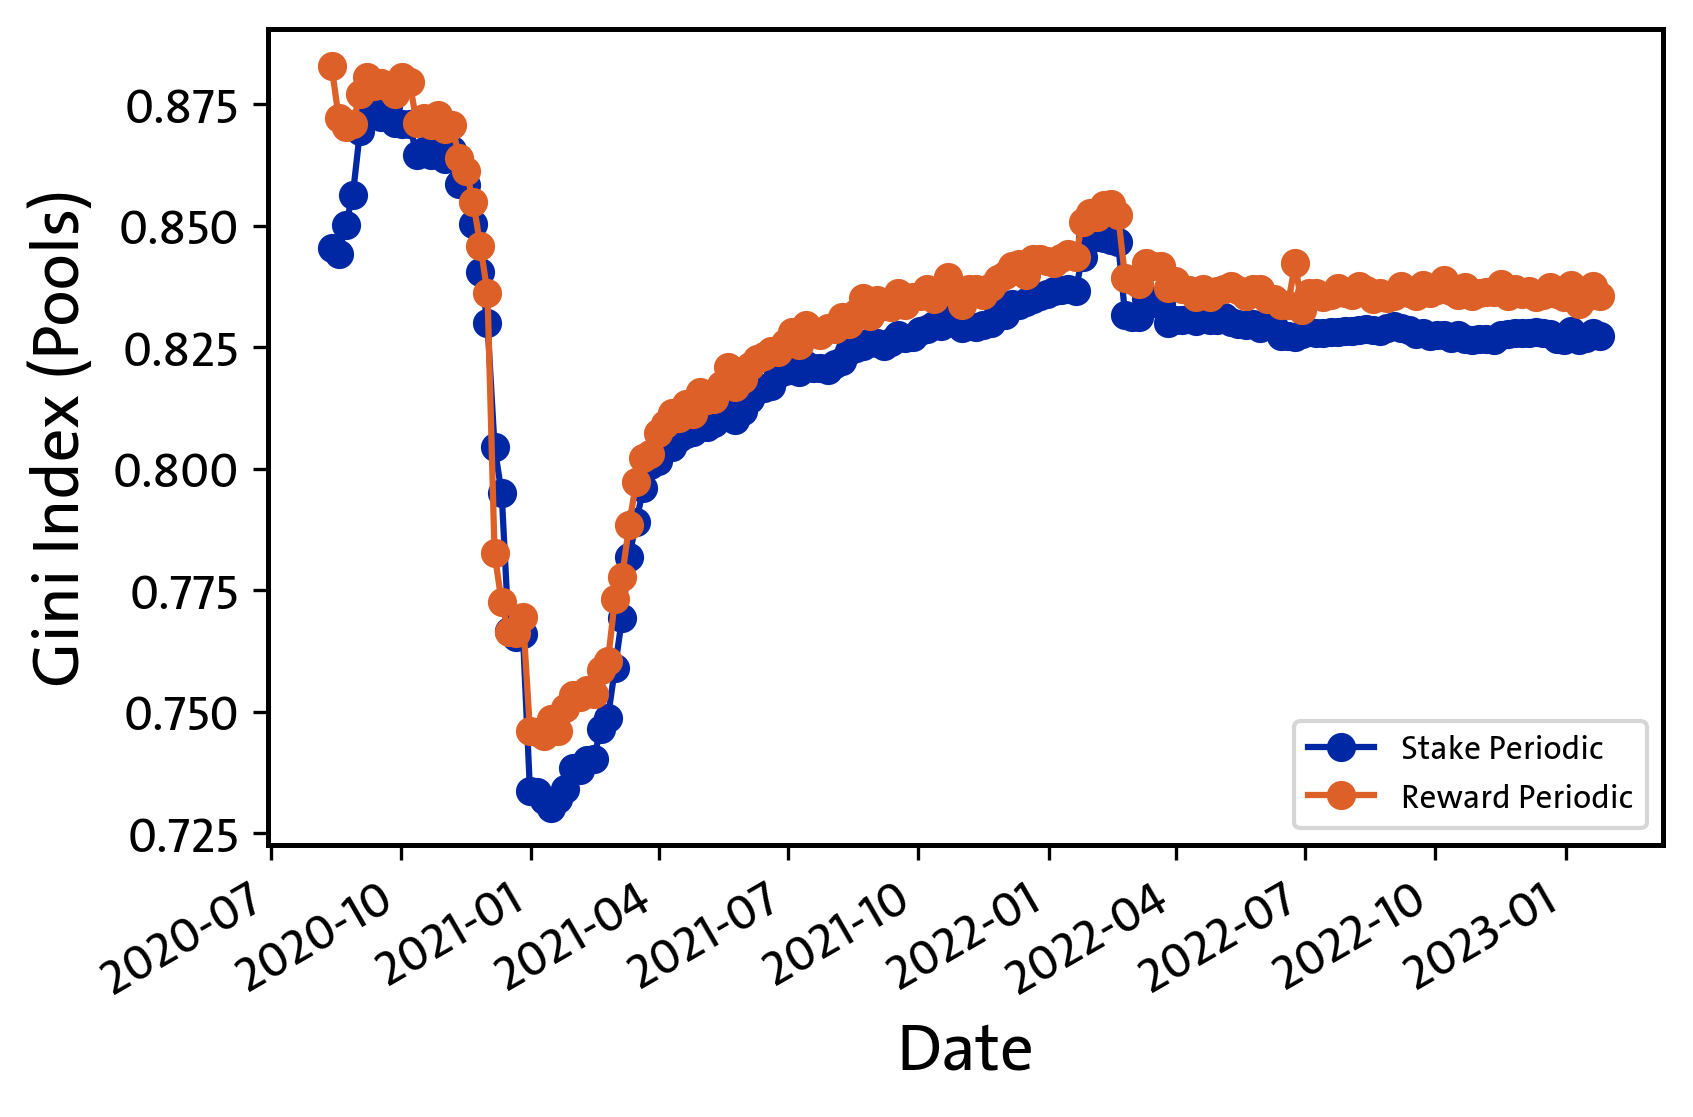

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')

#date_list = [str(INITIAL_DATE_CARDANO + datetime.timedelta(days=i)) for i in range(total_time_length_CARDANO)]
#date_list = pd.to_datetime(date_list)

date_list = [str(epochs_date_array[i]) for i in range(1,len(epochs_date_array)-1)]
date_list = pd.to_datetime(date_list)

#date_list = epochs_date_array

DF = pd.DataFrame()
DF = pd.DataFrame(gini_index_stakeOverActivePools_per_epoch[1:last_epoch_no-first_epoch_no], columns=['value1'])
DF['value2'] = pd.DataFrame(gini_index_rewardOverRewardedPools_per_epoch[1:last_epoch_no-first_epoch_no])
#DF['value3'] = pd.DataFrame(count_cumulative_rewarded_pools_per_epoch)
#DF['value4'] = pd.DataFrame(count_rewarded_pools_per_epoch)


DF = DF.set_index(date_list)
plt.plot(DF, marker='o')
plt.gcf().autofmt_xdate()

# Function add a legend 
plt.legend(['Stake Periodic', 'Reward Periodic'], fontsize="8", loc ="lower right")


plt.xlabel('Date')
plt.ylabel('Gini Index (Pools)')

# linear", "log", "symlog", "logit
#plt.xscale("linear")
#plt.yscale("log")

#plt.xlim(0, 60)
#plt.ylim(0, 60)


plt.savefig('fig_giniIndex_active_and_rewarded_pools.pdf', bbox_inches='tight', facecolor='white')
plt.show()




In [31]:
# Load/Store "entities_new_per_day_array" from/into file:


print('----------------------')
ct = datetime.datetime.now()
curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]


# Store "entities_new_per_day_array" into file:
'''
output_filename = BASE_ADDRESS + '/newPerDay_Entities__Cardano_TXs_All__' + curr_timestamp + '.txt'
print('output_filename = ', output_filename)
store_array_to_file(entities_new_per_day_array, output_filename)
'''


# Load  "entities_new_per_day_array" from file:

file_name = BASE_ADDRESS + '/newPerDay_Entities__Cardano_TXs_All__2023-04-22_012525.txt'
entities_new_per_day_array = load_file_to_array(file_name)


##########################################################################################
print('----------------------')
print('done!')


----------------------
----------------------
done!


In [32]:
# Find number of "new entities" in each "day":


print('----------------------')
ct = datetime.datetime.now()
print("start time: ", ct)


place_holder = 999999999999
entities_new_per_day_array        = [value for value in entities_new_per_day_array if value != place_holder] #remove placeholders
sorted_entities_new_per_day_array = np.sort(entities_new_per_day_array, axis=None)
num_of_days_entity                = max(sorted_entities_new_per_day_array) + 1
MAX_num_of_days                   = max(0, num_of_days_entity)


num_of_entities_per_day = np.array([0] * MAX_num_of_days)
for i in tqdm(range(MAX_num_of_days)):
    x = BinarySearch_Find_start_end(sorted_entities_new_per_day_array, i)
    if(x != -1):
        num_of_entities_per_day[i] = x[1] - x[0] + 1


##########################################################################################
print('----------------------')
et = datetime.datetime.now() - ct
print("Total elapsed time: ", et)

##########################################################################################
print('----------------------')
print('done!')



----------------------
start time:  2023-12-19 01:59:26.455416


100%|██████████| 1947/1947 [00:00<00:00, 174047.53it/s]

----------------------
Total elapsed time:  0:00:18.101167
----------------------
done!


In [33]:
# Load/Store "raw_addresses_new_per_day_array"                from/into file:
#            "Byron_payment_addresses_new_per_day_array", 
#            "Shelley_payment_addresses_new_per_day_array", 
#            "delegation_addresses_new_per_day_array"


print('----------------------')
ct = datetime.datetime.now()
print("start time: ", ct)



# Store "raw_addresses_new_per_day_array",              into file:
#       "Byron_payment_addresses_new_per_day_array", 
#       "Shelley_payment_addresses_new_per_day_array", 
#       "delegation_addresses_new_per_day_array"
'''
ct = datetime.datetime.now()
curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]

output_filename = BASE_ADDRESS + '/newPerDay_rawAddresses__Cardano_TXs_All__' + curr_timestamp + '.txt'
print('output_filename = ', output_filename)
store_array_to_file(raw_addresses_new_per_day_array, output_filename)

output_filename = BASE_ADDRESS + '/newPerDay_ByronAddresses__Cardano_TXs_All__' + curr_timestamp + '.txt'
print('output_filename = ', output_filename)
store_array_to_file(Byron_payment_addresses_new_per_day_array, output_filename)

output_filename = BASE_ADDRESS + '/newPerDay_ShelleyAddresses__Cardano_TXs_All__' + curr_timestamp + '.txt'
print('output_filename = ', output_filename)
store_array_to_file(Shelley_payment_addresses_new_per_day_array, output_filename)

output_filename = BASE_ADDRESS + '/newPerDay_delegationAddresses__Cardano_TXs_All__' + curr_timestamp + '.txt'
print('output_filename = ', output_filename)
store_array_to_file(delegation_addresses_new_per_day_array, output_filename)
'''



# Load  "raw_addresses_new_per_day_array",              from file:
#       "Byron_payment_addresses_new_per_day_array", 
#       "Shelley_payment_addresses_new_per_day_array", 
#       "delegation_addresses_new_per_day_array"

file_name = BASE_ADDRESS + '/newPerDay_rawAddresses__Cardano_TXs_All__2023-04-20_025121.txt'
raw_addresses_new_per_day_array             = load_file_to_array(file_name)

file_name = BASE_ADDRESS + '/newPerDay_ByronAddresses__Cardano_TXs_All__2023-04-20_025121.txt'
Byron_payment_addresses_new_per_day_array   = load_file_to_array(file_name)

file_name = BASE_ADDRESS + '/newPerDay_ShelleyAddresses__Cardano_TXs_All__2023-04-20_025121.txt'
Shelley_payment_addresses_new_per_day_array = load_file_to_array(file_name)

file_name = BASE_ADDRESS + '/newPerDay_delegationAddresses__Cardano_TXs_All__2023-04-20_025121.txt'
delegation_addresses_new_per_day_array      = load_file_to_array(file_name)


##########################################################################################
print('----------------------')
et = datetime.datetime.now() - ct
print("Total elapsed time: ", et)

##########################################################################################
print('----------------------')
print('done!')


----------------------
start time:  2023-12-19 01:59:44.563859
----------------------
Total elapsed time:  0:00:18.567932
----------------------
done!


In [34]:
# Find number of "new addresses" in each "day":



# Load  "raw_addresses_new_per_day_array",              from file:
#       "Byron_payment_addresses_new_per_day_array", 
#       "Shelley_payment_addresses_new_per_day_array", 
#       "delegation_addresses_new_per_day_array"


print('----------------------')
ct = datetime.datetime.now()
print("start time: ", ct)


print('----------------------')
ct_temp = datetime.datetime.now()

place_holder = 999999999999

raw_addresses_new_per_day_array             = [value for value in raw_addresses_new_per_day_array             if value != place_holder]
Byron_payment_addresses_new_per_day_array   = [value for value in Byron_payment_addresses_new_per_day_array   if value != place_holder]
Shelley_payment_addresses_new_per_day_array = [value for value in Shelley_payment_addresses_new_per_day_array if value != place_holder]
delegation_addresses_new_per_day_array      = [value for value in delegation_addresses_new_per_day_array      if value != place_holder]
print('days equal to place_holder were removed !')
et = datetime.datetime.now() - ct_temp
print("elapsed time: ", et)

print('----------------------')
ct_temp = datetime.datetime.now()
sorted_raw_addresses_new_per_day_array             = np.sort(raw_addresses_new_per_day_array,             axis=None)
sorted_Byron_payment_addresses_new_per_day_array   = np.sort(Byron_payment_addresses_new_per_day_array,   axis=None)
sorted_Shelley_payment_addresses_new_per_day_array = np.sort(Shelley_payment_addresses_new_per_day_array, axis=None)
sorted_delegation_addresses_new_per_day_array      = np.sort(delegation_addresses_new_per_day_array,      axis=None)
print('addresses_new_per_day_arrays were sorted !')
et = datetime.datetime.now() - ct_temp
print("elapsed time: ", et)


print('----------------------')
ct_temp = datetime.datetime.now()
num_of_days_raw        = max(sorted_raw_addresses_new_per_day_array)             + 1
num_of_days_byron      = max(sorted_Byron_payment_addresses_new_per_day_array)   + 1
num_of_days_shelley    = max(sorted_Shelley_payment_addresses_new_per_day_array) + 1
num_of_days_delegation = max(sorted_delegation_addresses_new_per_day_array)      + 1
print('num_of_days_raw        = ', num_of_days_raw)
print('num_of_days_byron      = ', num_of_days_byron)
print('num_of_days_shelley    = ', num_of_days_shelley)
print('num_of_days_delegation = ', num_of_days_delegation)
print(' ')

MAX_num_of_days = max(num_of_days_raw, num_of_days_byron, num_of_days_shelley, num_of_days_delegation)
print('max(num_of_days) = ', MAX_num_of_days)
et = datetime.datetime.now() - ct_temp
print("elapsed time: ", et)


print('----------------------')
ct_temp = datetime.datetime.now()

num_of_raw_addresses_per_day = np.array([0] * MAX_num_of_days)
for i in tqdm(range(MAX_num_of_days)):
    x = BinarySearch_Find_start_end(sorted_raw_addresses_new_per_day_array, i)
    if(x != -1):
        num_of_raw_addresses_per_day[i] = x[1] - x[0] + 1

#num_of_Byron_addresses_per_day = np.array([0] * MAX_num_of_days)
#for i in tqdm(range(MAX_num_of_days)):
#    x = BinarySearch_Find_start_end(sorted_Byron_payment_addresses_new_per_day_array, i)
#    if(x != -1):
#        num_of_Byron_addresses_per_day[i] = x[1] - x[0] + 1

#num_of_Shelley_addresses_per_day = np.array([0] * MAX_num_of_days)
#for i in tqdm(range(MAX_num_of_days)):
#    x = BinarySearch_Find_start_end(sorted_Shelley_payment_addresses_new_per_day_array, i)
#    if(x != -1):
#        num_of_Shelley_addresses_per_day[i] = x[1] - x[0] + 1

#num_of_delegation_addresses_per_day = np.array([0] * MAX_num_of_days)
#for i in tqdm(range(MAX_num_of_days)):
#    x = BinarySearch_Find_start_end(sorted_delegation_addresses_new_per_day_array, i)
#    if(x != -1):
#        num_of_delegation_addresses_per_day[i] = x[1] - x[0] + 1

et = datetime.datetime.now() - ct_temp
print("elapsed time: ", et)


print('----------------------')
et = datetime.datetime.now() - ct
print("Total elapsed time: ", et)


##########################################################################################

print('----------------------')
print('done!')


----------------------
start time:  2023-12-19 02:00:29.498525
----------------------
days equal to place_holder were removed !
elapsed time:  0:03:11.465599
----------------------
addresses_new_per_day_arrays were sorted !
elapsed time:  0:00:26.748777
----------------------
num_of_days_raw        =  1947
num_of_days_byron      =  1947
num_of_days_shelley    =  1947
num_of_days_delegation =  1947
 
max(num_of_days) =  1947
elapsed time:  0:00:05.549348
----------------------


100%|██████████| 1947/1947 [00:00<00:00, 160375.29it/s]

elapsed time:  0:00:00.016835
----------------------
Total elapsed time:  0:03:43.781206
----------------------
done!


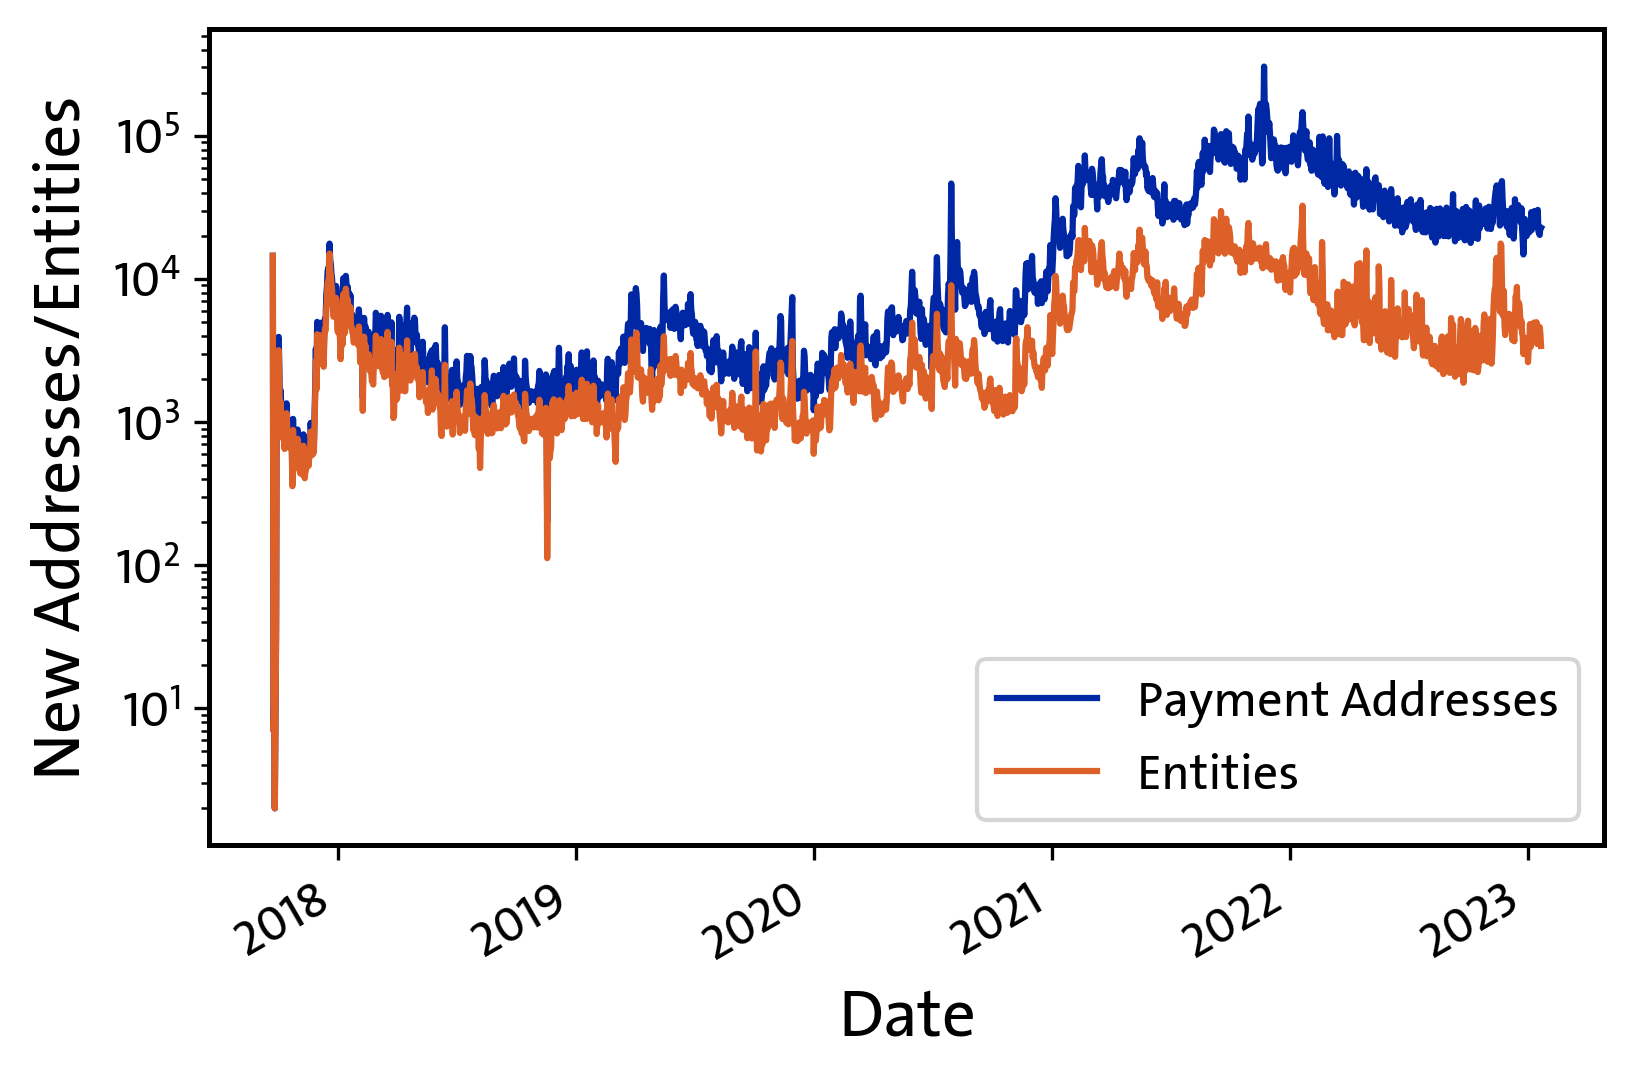

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')


INITIAL_DATE_CARDANO      = datetime.datetime.strptime('2017-09-23 21:44:51', '%Y-%m-%d %H:%M:%S').date()
FINAL_DATE_CARDANO        = datetime.datetime.strptime('2023-01-21 17:39:30', '%Y-%m-%d %H:%M:%S').date()
total_time_length_CARDANO = int((FINAL_DATE_CARDANO - INITIAL_DATE_CARDANO).total_seconds()/86400) + 1


date_list = [str(INITIAL_DATE_CARDANO + datetime.timedelta(days=i)) for i in range(total_time_length_CARDANO)]
date_list = pd.to_datetime(date_list)


DF = pd.DataFrame()
DF['Payment Addresses'] = num_of_raw_addresses_per_day        #label='Payment Addresses'
DF['Entities'] = num_of_entities_per_day        #label='Entities'
DF = DF.set_index(date_list)
plt.plot(DF)
plt.gcf().autofmt_xdate()

# Function add a legend  
plt.legend(['Payment Addresses', 'Entities'], loc ="lower right")

plt.xlabel('Date')
plt.ylabel('New Addresses/Entities')

# linear", "log", "symlog", "logit
#plt.xscale("linear")
plt.yscale("log")

#plt.xlim(0, 60)
#plt.ylim(0, 60)

plt.savefig('fig_new_entities_per_day.pdf', bbox_inches='tight', facecolor='white')
plt.show()


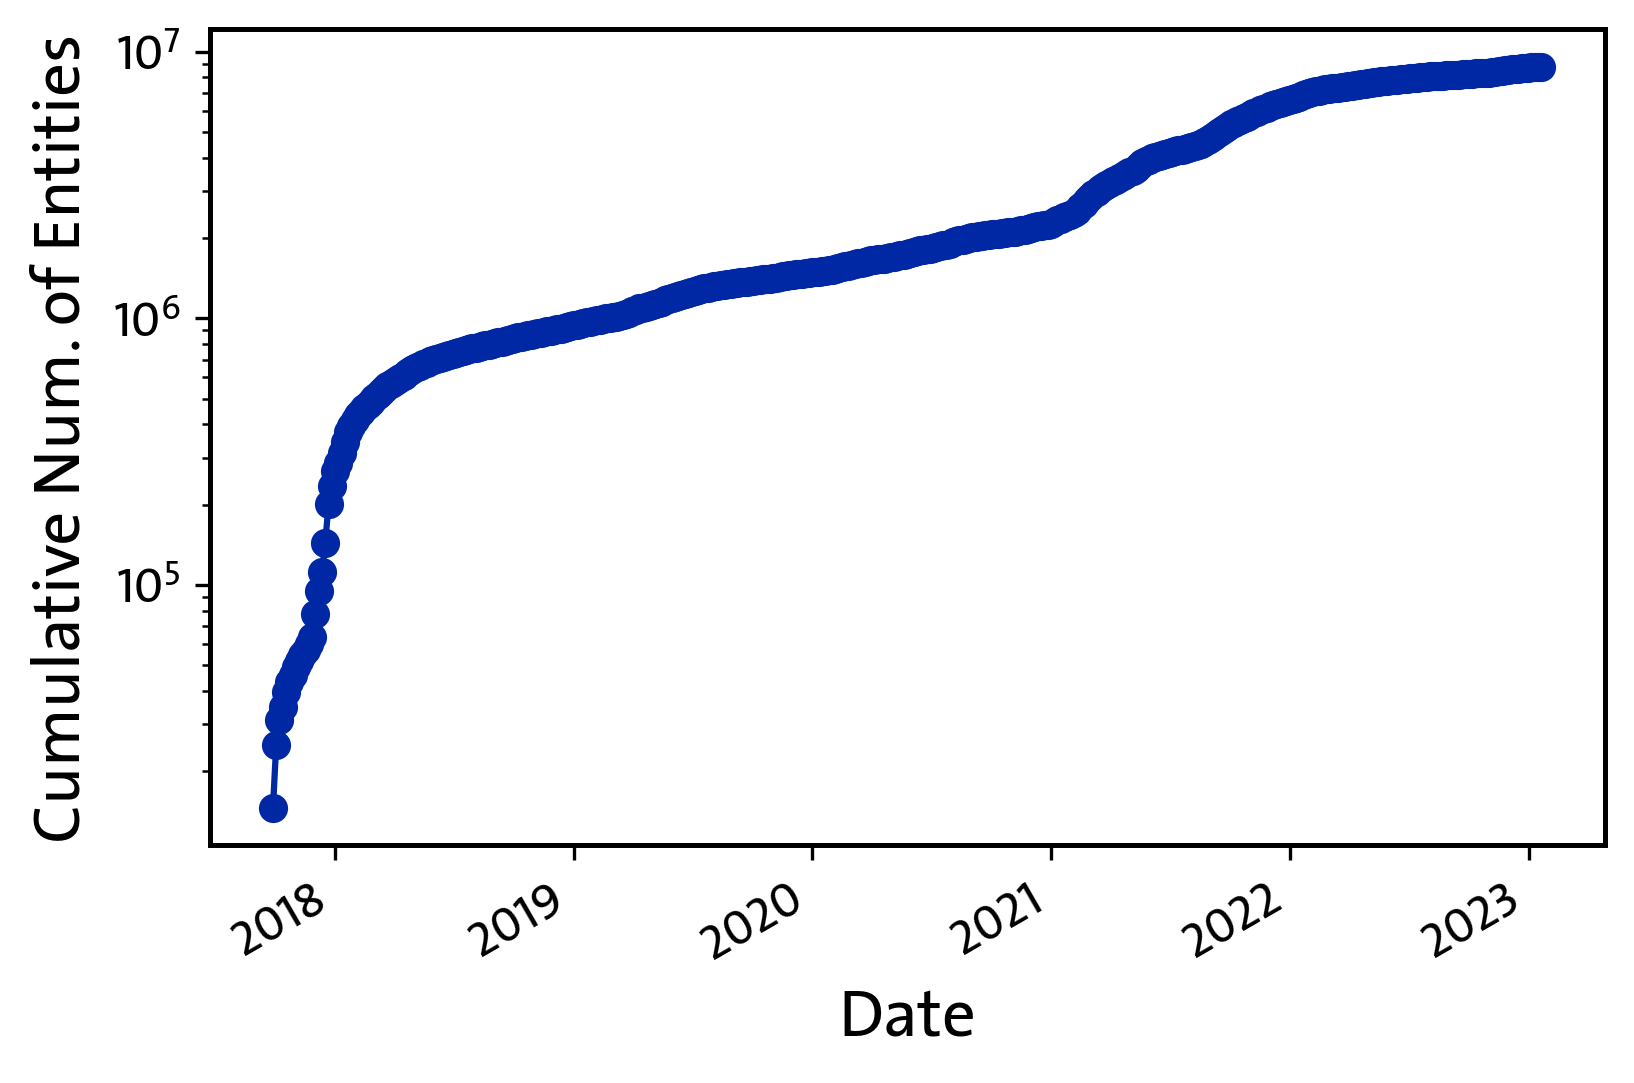

In [97]:
# Plot cumulative number of entities:

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')


first_epoch_no = 0
last_epoch_no  = 390
FIRST_DATE_CARDANO = datetime.datetime.strptime('2017-09-23 21:44:51', '%Y-%m-%d %H:%M:%S').date() # epoch_no = 0
LAST_DATE_CARDANO  = datetime.datetime.strptime('2023-01-30 21:46:16', '%Y-%m-%d %H:%M:%S').date() # epoch_no = 391


epochs_array      = list(range(first_epoch_no, last_epoch_no+1))
epochs_date_array = [0]*len(epochs_array)
for i in range(len(epochs_date_array)):
    epochs_date_array[i] = FIRST_DATE_CARDANO + datetime.timedelta(days=(i*5))


date_list = [str(epochs_date_array[i]) for i in range(1,len(epochs_date_array)-1)]
date_list = pd.to_datetime(date_list)




DF = pd.DataFrame()
DF = pd.DataFrame(num_of_entities_per_epoch_cumulative[0:-1], columns=['value1'])
#DF['value2'] = pd.DataFrame(active_addresses_per_epoch_array[10:-1])

DF = DF.set_index(date_list)
plt.plot(DF, marker='o')
plt.gcf().autofmt_xdate()

# Function add a legend 
#plt.legend(['Cumulative Num. of Entities'], loc ="upper left")

plt.xlabel('Date')
plt.ylabel('Cumulative Num. of Entities')

# linear", "log", "symlog", "logit
#plt.xscale("linear")
plt.yscale("log")

#plt.xlim(0, 60)
#plt.ylim(0, 60)


plt.savefig('fig_entities_cumulative_number_perEpoch.pdf', bbox_inches='tight', facecolor='white')
plt.show()




In [36]:
def sum_of_five_elements(input_list):
    output_list = []
    for i in range(0, len(input_list), 5):
        # Slice the input list to get the next five elements
        five_elements = input_list[i:i+5]        
        # Calculate the sum of the five elements and append to the output list
        sum_of_five = sum(five_elements)
        output_list.append(sum_of_five)
    return output_list


def cumulative_sum(input_list):
    cum_sum = 0  # Initialize the cumulative sum
    cum_sum_list = []  # Initialize the list to store cumulative sums
    for num in input_list:
        cum_sum += num  # Add the current number to the cumulative sum
        cum_sum_list.append(cum_sum)  # Append the cumulative sum to the result list
    return cum_sum_list



num_of_raw_addresses_per_epoch = sum_of_five_elements(num_of_raw_addresses_per_day)
num_of_entities_per_epoch      = sum_of_five_elements(num_of_entities_per_day)

num_of_raw_addresses_per_epoch_cumulative = cumulative_sum(num_of_raw_addresses_per_epoch)
num_of_entities_per_epoch_cumulative      = cumulative_sum(num_of_entities_per_epoch)

num_of_raw_addresses_per_epoch_cumulative__LATEST = num_of_raw_addresses_per_epoch_cumulative[-len(count_cumulative_rewarded_pools_per_epoch):]
num_of_entities_per_epoch_cumulative__LATEST      = num_of_entities_per_epoch_cumulative[-len(count_cumulative_rewarded_pools_per_epoch):]

##########################################################################################

print('----------------------')
print('done!')



----------------------
done!


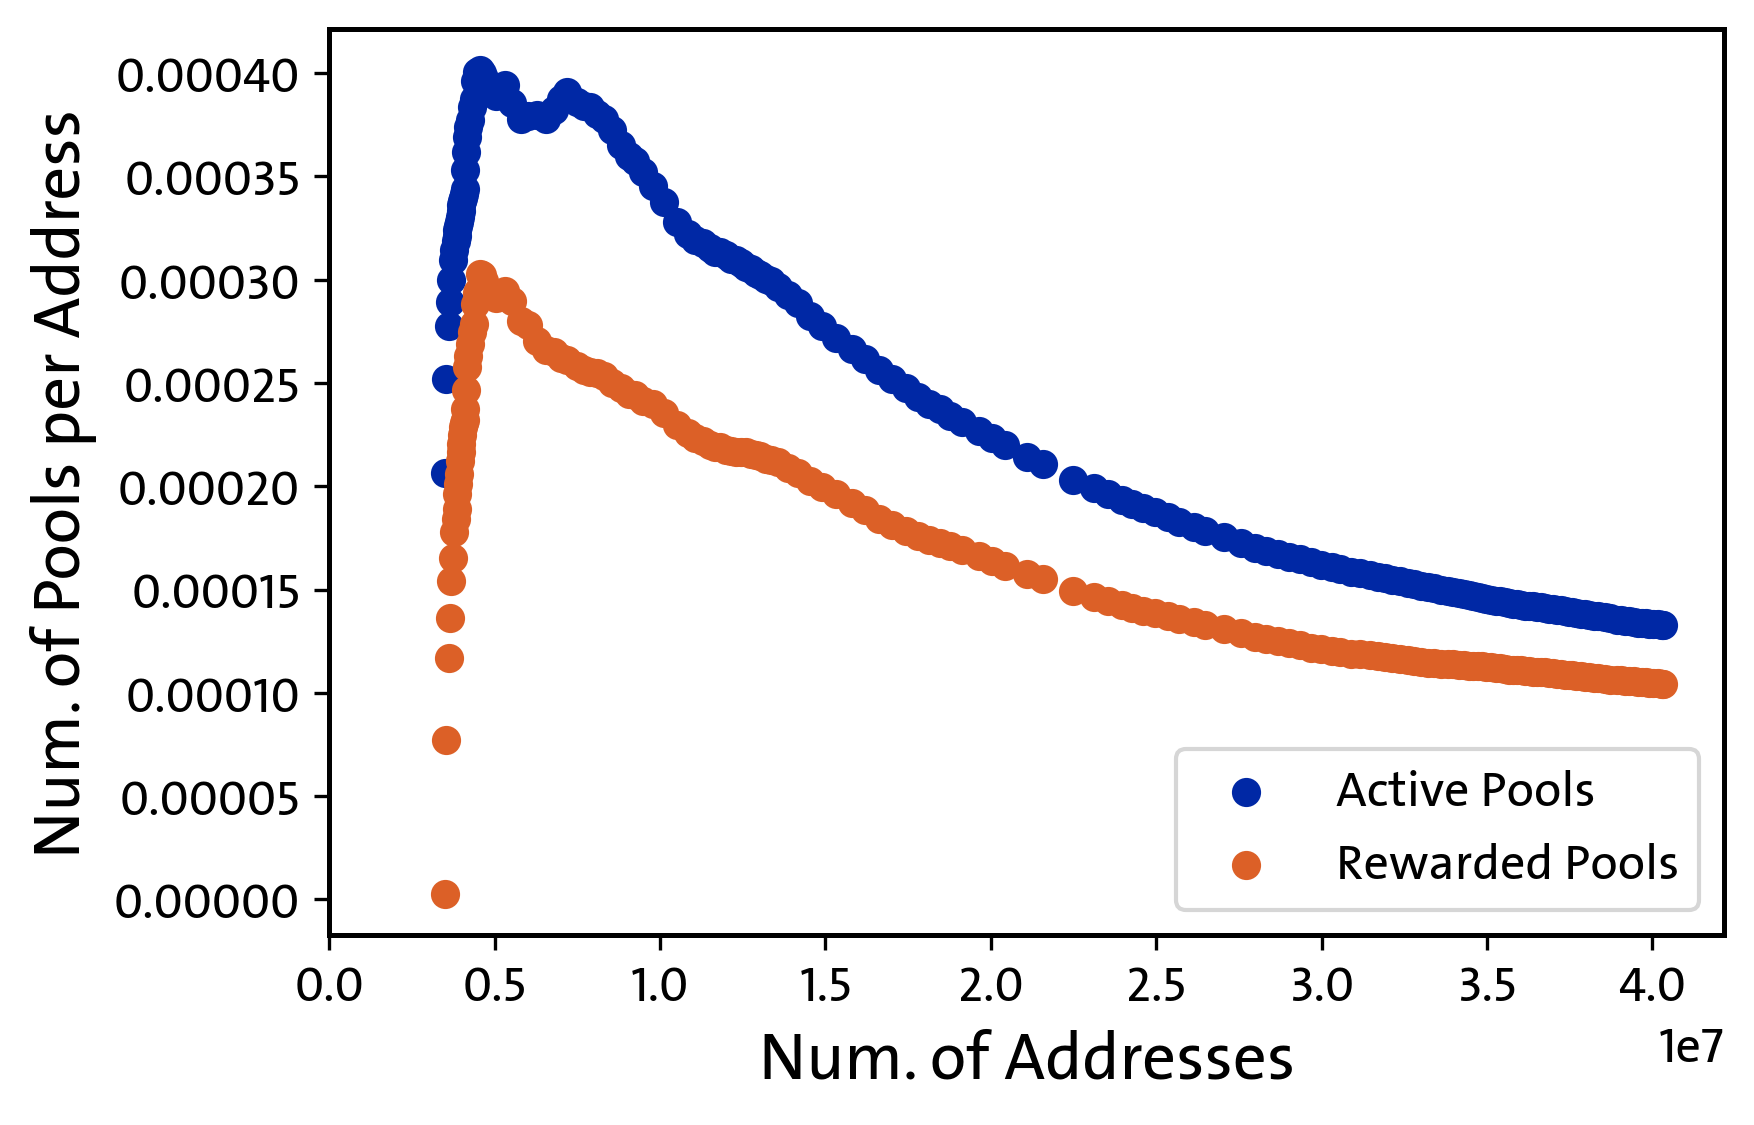

In [37]:
import matplotlib.pyplot as plt
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')

# Sample data
x1 = num_of_raw_addresses_per_epoch_cumulative__LATEST
y1 = count_cumulative_active_pools_per_epoch

x2 = num_of_raw_addresses_per_epoch_cumulative__LATEST
y2 = count_cumulative_rewarded_pools_per_epoch


x1 = np.array(x1)
y1 = np.array(y1)
y1 = y1 / x1
x2 = np.array(x2)
y2 = np.array(y2)
y2 = y2 / x2



# Create a figure and axis
fig, ax = plt.subplots()


# Create a scatter plot
plt.scatter(x1, y1, label='Scatter Plot', marker='o')
plt.scatter(x2, y2, label='Scatter Plot', marker='o')


plt.legend(['Active Pools', 'Rewarded Pools'], loc ="lower right")

plt.xlabel('Num. of Addresses')
#plt.ylabel('Num. of Pools')
plt.ylabel('Num. of Pools per Address')

plt.xlim(0)
#plt.ylim(0, 60)

# Show the plot
plt.savefig('fig_num_of_pools_vs_addresses.pdf', bbox_inches='tight', facecolor='white')
plt.show()


In [ ]:
epochs: 260 - 266

In [89]:
x4_indices = np.where(y4 == max(y4))
x4[x4_indices][0], x4_indices[0][0], y4[56]



(3638509, 56, 0.00064586895346418)

In [90]:
x3_indices = np.where(y3 == max(y3))
x3[x3_indices][0], x3_indices[0][0], y3[50]



(3309930, 50, 0.0009483584244984033)

In [92]:
x3[50], x3[53], x3[56]

(3309930, 3480397, 3638509)

In [93]:
x4[50], x4[53], x4[56]

(3309930, 3480397, 3638509)

In [73]:
max(y3), max(y4)

(0.0009483584244984033, 0.00064586895346418)

In [84]:
FIRST_DATE_POOLS_STAKING = datetime.datetime.strptime('2020-08-08 21:44:51', '%Y-%m-%d %H:%M:%S').date() # epoch_no = 210
my_time = FIRST_DATE_POOLS_STAKING + datetime.timedelta(days=(50*5))
my_time


datetime.date(2021, 4, 15)

In [99]:
FIRST_DATE_POOLS_STAKING = datetime.datetime.strptime('2020-08-08 21:44:51', '%Y-%m-%d %H:%M:%S').date() # epoch_no = 210
my_time = FIRST_DATE_POOLS_STAKING + datetime.timedelta(days=(24*5))
my_time


datetime.date(2020, 12, 6)

In [85]:
FIRST_DATE_POOLS_STAKING = datetime.datetime.strptime('2020-08-08 21:44:51', '%Y-%m-%d %H:%M:%S').date() # epoch_no = 210
my_time = FIRST_DATE_POOLS_STAKING + datetime.timedelta(days=(56*5))
my_time


datetime.date(2021, 5, 15)

In [ ]:
x3[50], x4[50]


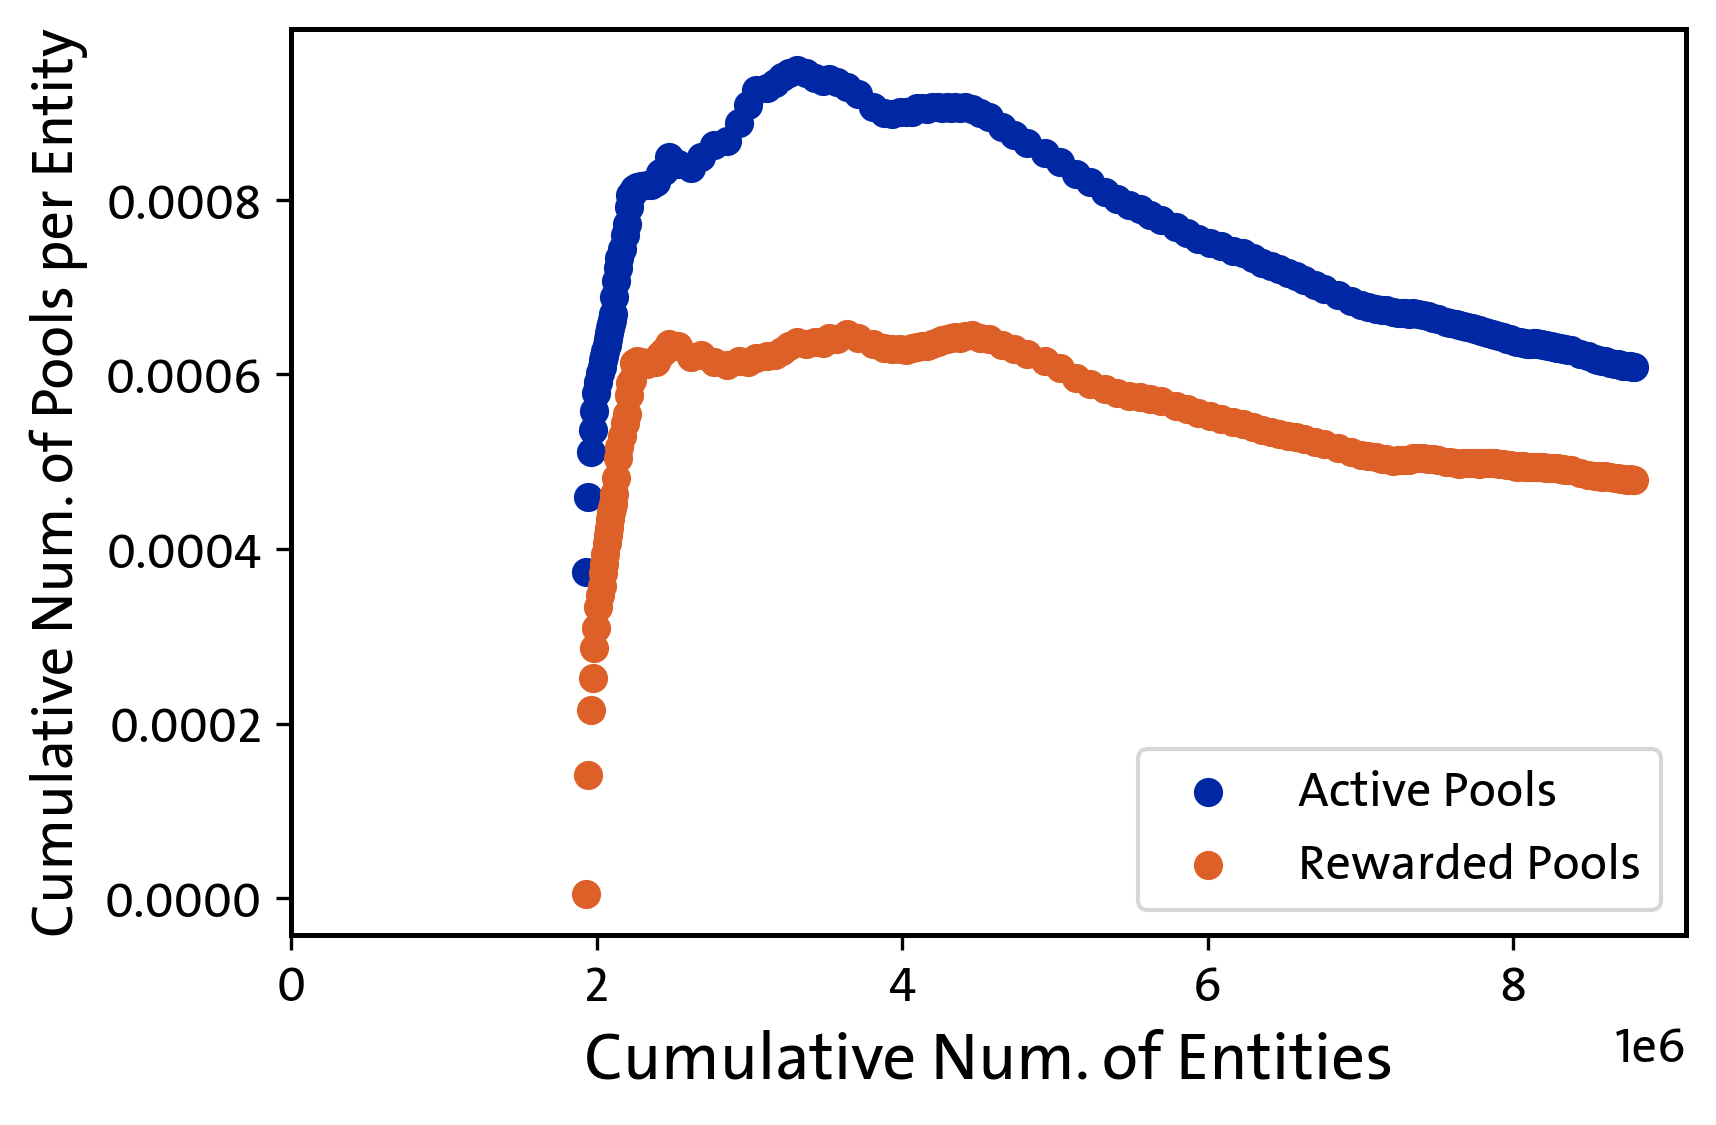

In [91]:
import matplotlib.pyplot as plt
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')

x3 = num_of_entities_per_epoch_cumulative__LATEST
y3 = count_cumulative_active_pools_per_epoch


x4 = num_of_entities_per_epoch_cumulative__LATEST
y4 = count_cumulative_rewarded_pools_per_epoch



x3 = np.array(x3)
y3 = np.array(y3)
y3 = y3 / x3
x4 = np.array(x4)
y4 = np.array(y4)
y4 = y4 / x4


# Create a figure and axis
fig, ax = plt.subplots()


# Create a scatter plot
plt.scatter(x3, y3, label='Scatter Plot', marker='o')
plt.scatter(x4, y4, label='Scatter Plot', marker='o')

plt.legend(['Active Pools', 'Rewarded Pools'], loc ="lower right")

plt.xlabel('Cumulative Num. of Entities')
#plt.ylabel('Num. of Pools')
plt.ylabel('Cumulative Num. of Pools per Entity', fontsize=14)

plt.xlim(0)
#plt.ylim(0, 60)

# Show the plot
plt.savefig('fig_num_of_pools_vs_entities.pdf', bbox_inches='tight', facecolor='white')
plt.show()


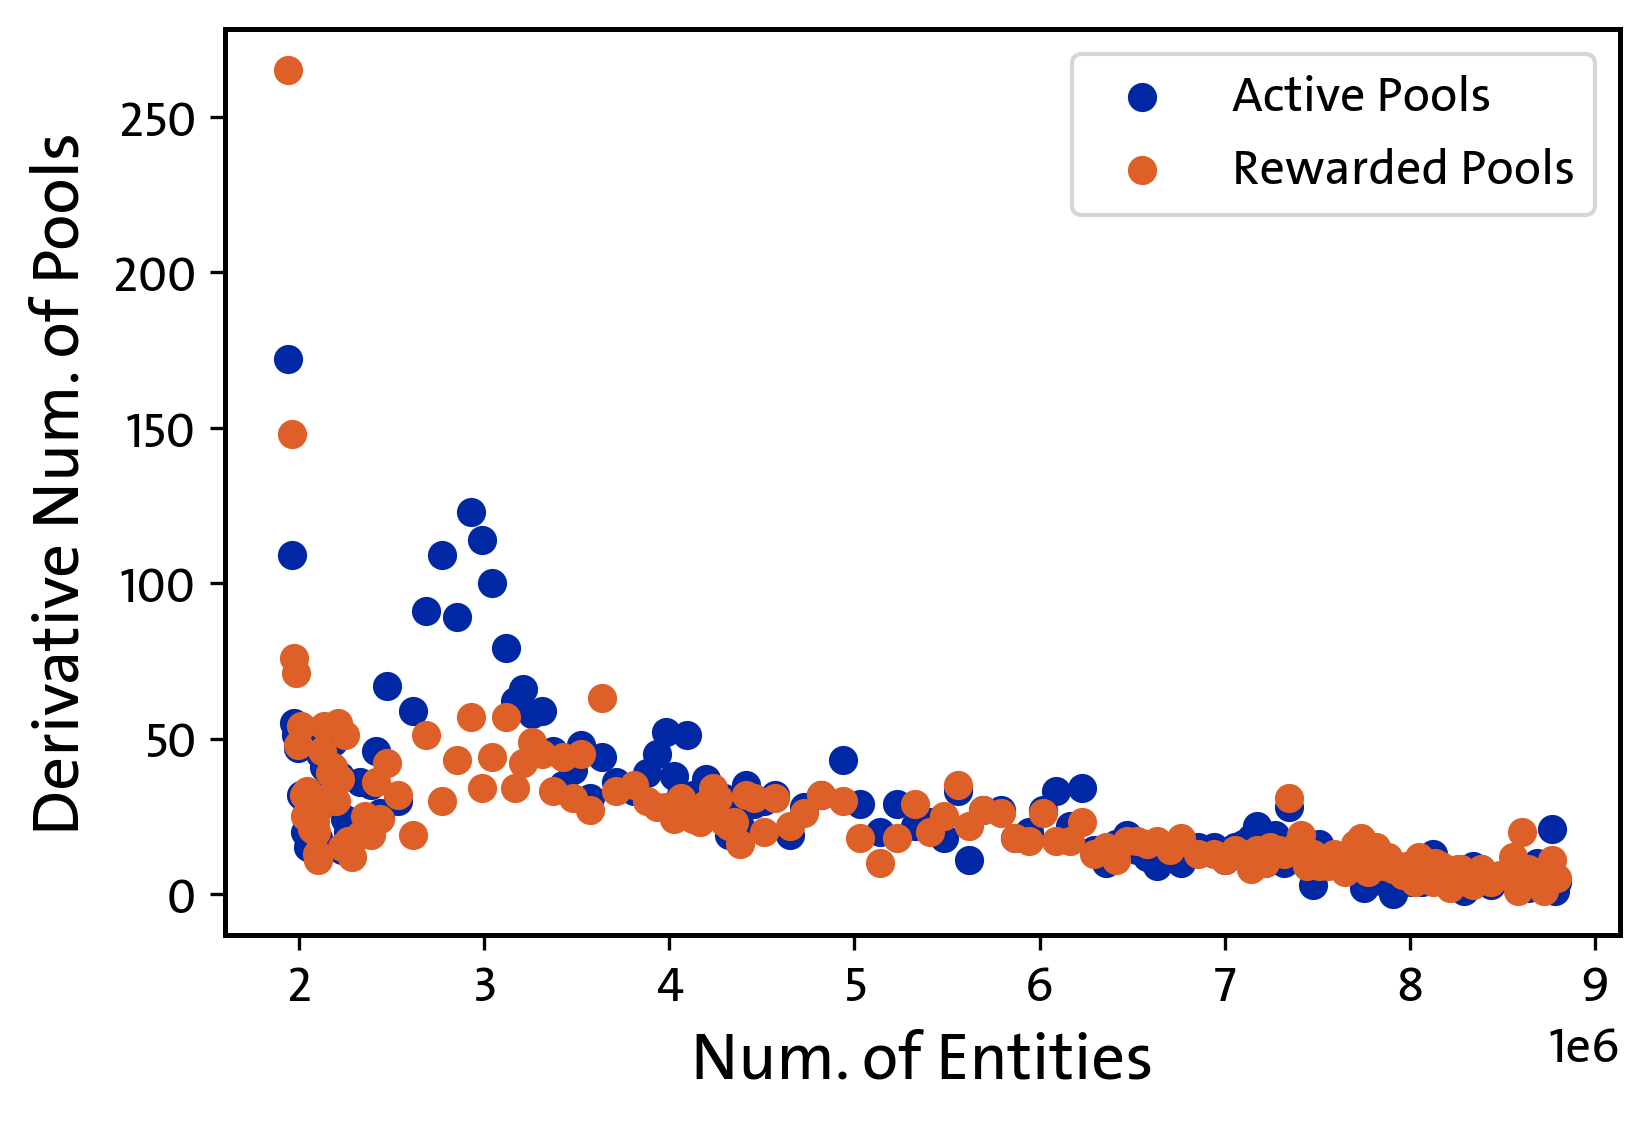

In [41]:
# Plot derivative number of pools vs. entities:

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')

# Convert the list to a NumPy array
count_cumulative_active_pools_per_epoch__NP = np.array(count_cumulative_active_pools_per_epoch)
derivative = np.diff(count_cumulative_active_pools_per_epoch__NP)
x5 = num_of_entities_per_epoch_cumulative__LATEST[1:]
y5 = derivative

# Convert the list to a NumPy array
count_cumulative_rewarded_pools_per_epoch__NP = np.array(count_cumulative_rewarded_pools_per_epoch)
derivative = np.diff(count_cumulative_rewarded_pools_per_epoch__NP)
x6 = num_of_entities_per_epoch_cumulative__LATEST[1:]
y6 = derivative


# Create a figure and axis
fig, ax = plt.subplots()


# Create a scatter plot
plt.scatter(x5, y5, label='Scatter Plot', marker='o')
plt.scatter(x6, y6, label='Scatter Plot', marker='o')

plt.legend(['Active Pools', 'Rewarded Pools'], loc ="upper right")

plt.xlabel('Num. of Entities')
plt.ylabel('Derivative Num. of Pools')


# Show the plot
plt.savefig('fig_DERIVATIVE_num_of_pools_vs_entities.pdf', bbox_inches='tight', facecolor='white')
plt.show()



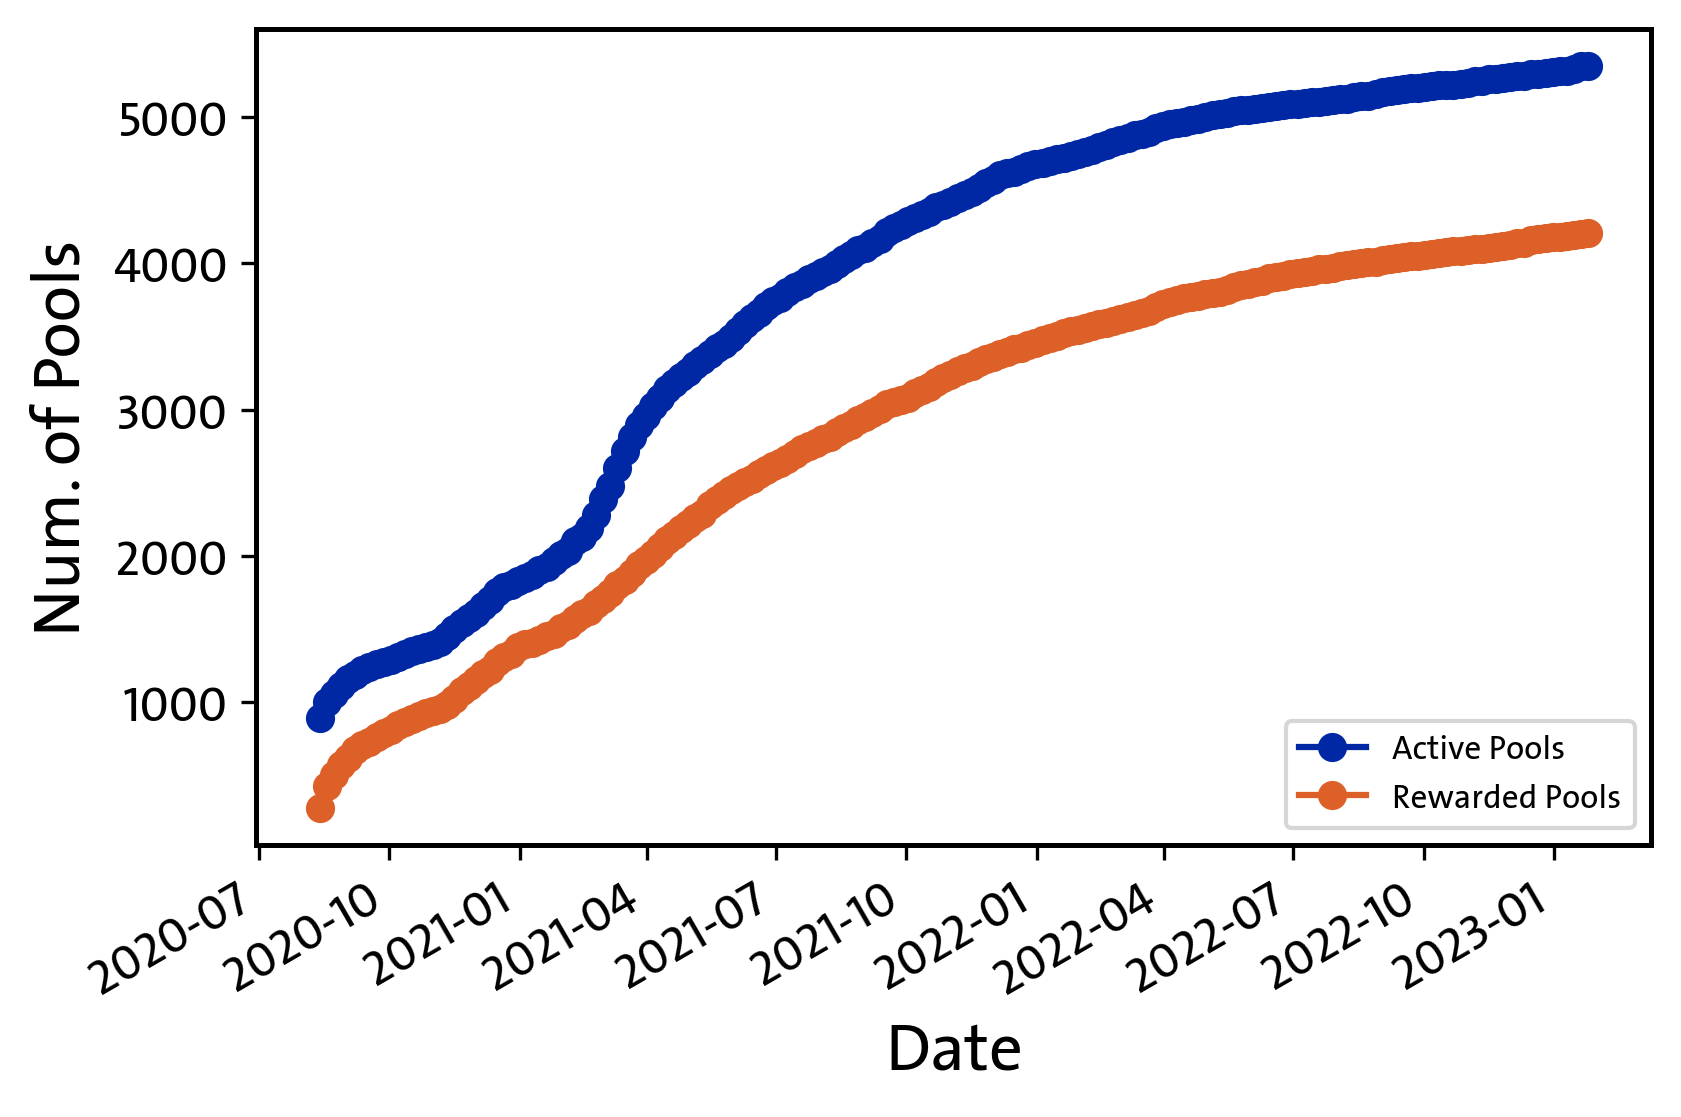

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')


first_epoch_no = 210
last_epoch_no  = 391
FIRST_DATE_POOLS_STAKING = datetime.datetime.strptime('2020-08-08 21:44:51', '%Y-%m-%d %H:%M:%S').date() # epoch_no = 210
LAST_DATE_POOLS_STAKING  = datetime.datetime.strptime('2023-01-30 21:46:16', '%Y-%m-%d %H:%M:%S').date() # epoch_no = 391

#total_num_of_epochs = int(int((LAST_DATE_POOLS_STAKING - FIRST_DATE_POOLS_STAKING).total_seconds()/86400)/5) + 1
total_num_of_epochs = int(last_epoch_no - first_epoch_no + 1)

epochs_array      = list(range(first_epoch_no, last_epoch_no+1))
epochs_date_array = [0]*len(epochs_array)
for i in range(len(epochs_date_array)):
    epochs_date_array[i] = FIRST_DATE_POOLS_STAKING + datetime.timedelta(days=(i*5))




#date_list = [str(INITIAL_DATE_CARDANO + datetime.timedelta(days=i)) for i in range(total_time_length_CARDANO)]
#date_list = pd.to_datetime(date_list)
date_list = [str(epochs_date_array[i]) for i in range(1,len(epochs_date_array)-1)]
date_list = pd.to_datetime(date_list)
#date_list = epochs_date_array



#x3 = num_of_entities_per_epoch_cumulative__LATEST
#y3 = count_cumulative_active_pools_per_epoch

#x4 = num_of_entities_per_epoch_cumulative__LATEST
#y4 = count_cumulative_rewarded_pools_per_epoch



DF = pd.DataFrame()
DF = pd.DataFrame(count_cumulative_active_pools_per_epoch[1:last_epoch_no-first_epoch_no], columns=['value1'])
DF['value2'] = pd.DataFrame(count_cumulative_rewarded_pools_per_epoch[1:last_epoch_no-first_epoch_no])
#DF['value3'] = pd.DataFrame(count_cumulative_rewarded_pools_per_epoch)
#DF['value4'] = pd.DataFrame(count_rewarded_pools_per_epoch)

DF = DF.set_index(date_list)
plt.plot(DF, marker='o')
plt.gcf().autofmt_xdate()

# Function add a legend 
plt.legend(['Active Pools', 'Rewarded Pools'], fontsize="8", loc ="lower right")


plt.xlabel('Date')
plt.ylabel('Num. of Pools')

# linear", "log", "symlog", "logit
#plt.xscale("linear")
#plt.yscale("log")

#plt.xlim(0, 60)
#plt.ylim(0, 60)


plt.savefig('fig_active_and_rewarded_pools_per_Epoch.pdf', bbox_inches='tight', facecolor='white')
plt.show()




In [4]:
# Store/Load graph object "Graph G Addrs network" to/from file:


# Store graph object to file:
'''
print('----------------------')
# ct stores current time
ct = datetime.datetime.now()
print("current time: ", ct)


import pickle
curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
output_filename = BASE_ADDRESS + '/Graph_G_AddrsNetwork_Heuristic1noSC_LinkToALLAddressesInTX__Cardano_TXs_All__' + curr_timestamp + '.pickle'
print('output_filename = ', output_filename)
pickle.dump(G, open(output_filename, 'wb'))


##########################################################################################
print('----------------------')
et = datetime.datetime.now() - ct
print("Total elapsed time (Store G into file): ", et)

##########################################################################################
print('----------------------')
print('done!')
'''



# Load graph object from file:
print('----------------------')
# ct stores current time
ct = datetime.datetime.now()
print("current time: ", ct)


import pickle
input_filename = BASE_ADDRESS + '/Graph_G_AddrsNetwork_Heuristic1noSC_LinkToALLAddressesInTX__Cardano_TXs_All__2023-02-26_000507.pickle'
print('input_filename = ', input_filename)
G = pickle.load(open(input_filename, 'rb'))



##########################################################################################
print('----------------------')
et = datetime.datetime.now() - ct
print("Total elapsed time (Load G from file): ", et)

##########################################################################################
print('----------------------')
print('done!')



----------------------
current time:  2023-10-23 19:07:43.794743
input_filename =  /local/scratch/exported/parsed_blockchains/cardano_mostafa/Graph_G_AddrsNetwork_Heuristic1noSC_LinkToALLAddressesInTX__Cardano_TXs_All__2023-02-26_000507.pickle
----------------------
Total elapsed time (Load G from file):  0:09:45.574016
----------------------
done!


In [6]:
# Find all connected components:

import networkx as nx

print('----------------------')
# ct stores current time
ct = datetime.datetime.now()
print("current time: ", ct)



all_connected_components = list(sorted(nx.connected_components(G), key=len, reverse=True))



##########################################################################################
print('----------------------')
et = datetime.datetime.now() - ct
print("Total elapsed time: ", et)

##########################################################################################
print('----------------------')
print('done!')



----------------------
current time:  2023-10-23 19:18:18.605121
----------------------
Total elapsed time:  0:04:56.576436
----------------------
done!


In [7]:
# Extract some connected component:

import networkx as nx


print('----------------------')
# ct stores current time
ct = datetime.datetime.now()
print("current time: ", ct)



#largest_cc = max(nx.connected_components(G), key=len)
import pickle

for n in tqdm(range(1000, 1500+1, 25)):
    sample_cc = all_connected_components[n]
    sample_cc_subgraph = G.subgraph(sample_cc).copy()

    #curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]
    output_filename = '/local/scratch/exported/cardanoAddrsNetwork' + str(int((n-1000)/25)).zfill(2) + '.pickle'
    #print('output_filename = ', output_filename)
    pickle.dump(sample_cc_subgraph, open(output_filename, 'wb'))


'''
print('Is Connected    (sample_cc_subgraph) = ', nx.is_connected(sample_cc_subgraph))
print('Number of Nodes (sample_cc_subgraph) = ', sample_cc_subgraph.number_of_nodes())
print('Number of Edges (sample_cc_subgraph) = ', sample_cc_subgraph.number_of_edges())
print('----------------------')
# Find weighted degrees of nodes:
degree_sequence = sorted((d for n, d in sample_cc_subgraph.degree(weight='weight')), reverse=False)
print('Sum Weighted Degrees (sample_cc_subgraph) = ', sum(degree_sequence))
print('Max Weighted Degrees (sample_cc_subgraph) = ', max(degree_sequence))

print('----------------------')
for i in range(1, 15):
    x = BinarySearch_Find_start_end(degree_sequence, i)
    if(x != -1):
        print('Number of nodes with Weighted Degree \"' + str(i) + '\" = ', x[1] - x[0] + 1)
'''


##########################################################################################
print('----------------------')
et = datetime.datetime.now() - ct
print("Total elapsed time: ", et)

##########################################################################################
print('----------------------')
print('done!')


----------------------
current time:  2023-10-23 19:23:16.034118


100%|██████████| 21/21 [00:00<00:00, 31.44it/s]

----------------------
Total elapsed time:  0:00:00.680406
----------------------
done!


In [10]:
# Read ("sorted" "unique" array_list) [raw_address_list/payment_address_list/delegation_address_list] from file:

print('----------------------')
ct = datetime.datetime.now()
print('Start Time: ', ct)


file_name = BASE_ADDRESS + '/Unique_AddressesListRaw__Cardano_TXs_All__2023-02-28_143357.txt'
unique_raw_addresses = load_file_to_array (file_name)
print('Length of \"unique_raw_addresses\"        = ' + str(len(unique_raw_addresses)))


file_name = BASE_ADDRESS + '/Unique_AddressesListPayment__Cardano_TXs_All__2023-02-28_143953.txt'
unique_payment_addresses = load_file_to_array (file_name)
print('Length of \"unique_payment_addresses\"    = ' + str(len(unique_payment_addresses)))


file_name = BASE_ADDRESS + '/Unique_AddressesListDelegation__Cardano_TXs_All__2023-02-28_144415.txt'
unique_delegation_addresses = load_file_to_array (file_name)
print('Length of \"unique_delegation_addresses\" = ' + str(len(unique_delegation_addresses)))


##########################################################################################
print('----------------------')
print('done!')



----------------------
Start Time:  2023-10-27 12:05:34.968004
Length of "unique_raw_addresses"        = 40330345
Length of "unique_payment_addresses"    = 40324960
Length of "unique_delegation_addresses" = 3868049
----------------------
done!


In [11]:
# Read clustering_array[] from file:

print('----------------------')
ct = datetime.datetime.now()
print('Start Time: ', ct)


file_name = BASE_ADDRESS + '/clusteringArrayList_Heuristic1noSC__Cardano_TXs_All__2023-02-25_223957.txt'
clustering_array_heur1 = load_file_to_array (file_name)


file_name = BASE_ADDRESS + '/clusteringArrayList_Heuristic2__Cardano_TXs_All__2023-03-26_110150.txt'
clustering_array_heur2 = load_file_to_array (file_name)


file_name = BASE_ADDRESS + '/clusteringArrayList_Heuristic1noSC_AND_Heuristic2__Cardano_TXs_All__2023-03-26_141212.txt'
clustering_array_heur1and2 = load_file_to_array (file_name)



print('----------------------')
#unique_payment_addresses_len = len(unique_payment_addresses)
unique_raw_addresses_len        = len(unique_raw_addresses)
unique_payment_addresses_len    = len(unique_payment_addresses)
unique_delegation_addresses_len = len(unique_delegation_addresses)

print('unique_raw_addresses_len               = ', unique_raw_addresses_len)
print('unique_payment_addresses_len           = ', unique_payment_addresses_len)
print('unique_delegation_addresses_len        = ', unique_delegation_addresses_len)

print('----------------------')
print('Length of \"clustering_array_heur1\"     = ', len(clustering_array_heur1))
print('number of clusters_heur1               = ', len(np.unique(clustering_array_heur1)))
print('Length of \"clustering_array_heur2\"     = ', len(clustering_array_heur2))
print('number of clusters_heur2               = ', len(np.unique(clustering_array_heur2)))
print('Length of \"clustering_array_heur1and2\" = ', len(clustering_array_heur1and2))
print('number of clusters_heur1and2           = ', len(np.unique(clustering_array_heur1and2)))


##########################################################################################
print('----------------------')
print('done!')



----------------------
Start Time:  2023-10-27 12:07:01.258473
----------------------
unique_raw_addresses_len               =  40330345
unique_payment_addresses_len           =  40324960
unique_delegation_addresses_len        =  3868049
----------------------
Length of "clustering_array_heur1"     =  40324960
number of clusters_heur1               =  19249106
Length of "clustering_array_heur2"     =  40324960
number of clusters_heur2               =  18529342
Length of "clustering_array_heur1and2" =  40324960
number of clusters_heur1and2           =  8805791
----------------------
done!


In [40]:
# Calculate "Gini Index of Entities":


print('----------------------')
ct = datetime.datetime.now()
curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]

first_epoch_no = 0
last_epoch_no  = 391
total_num_of_epochs = int(last_epoch_no - first_epoch_no + 1)

gini_index_entityBalances_remove_0   = [0]*total_num_of_epochs
gini_index_entityBalances_remove_10  = [0]*total_num_of_epochs
gini_index_entityBalances_remove_100 = [0]*total_num_of_epochs


# Choose from: "clustering_array_heur1"  OR  "clustering_array_heur2"  OR  "clustering_array_heur1and2"
clustering_array = clustering_array_heur1and2



# Store "balances_per_entity_array" into file:
'''
output_filename = BASE_ADDRESS + '/YuZhang_Cardano_Balances_Entities/YuZhang__BalancesPerEntityDay_' + str(current_delta_day).zfill(4) + '__Cardano_TXs_All.txt'
print('output_filename = ', output_filename)
store_array_to_file(balances_per_entity_array, output_filename)
'''



# Load  "balances_per_entity_array" from file:

for i in tqdm(range(0, 1945+1, 5)):
    file_name = BASE_ADDRESS + '/YuZhang_Cardano_Balances_Entities/YuZhang__BalancesPerEntityDay_' + str(i).zfill(4) + '__Cardano_TXs_All.txt'
    balances_per_entity_ = load_file_to_array(file_name)
    balances_per_entity_ = [x for x in balances_per_entity_ if x != 0] # remove zeros
    balances_per_entity_.sort(reverse=True)
    balances_per_entity_remove_0_   = balances_per_entity_[0:]   # Remove the top n maximum values
    balances_per_entity_remove_10_  = balances_per_entity_[10:]  # Remove the top n maximum values
    balances_per_entity_remove_100_ = balances_per_entity_[100:] # Remove the top n maximum values

    balances_per_entity_remove_0 = []
    for j in range(len(balances_per_entity_remove_0_)):
        balances_per_entity_remove_0.append(int(balances_per_entity_remove_0_[j]))

    balances_per_entity_remove_10 = []
    for j in range(len(balances_per_entity_remove_10_)):
        balances_per_entity_remove_10.append(int(balances_per_entity_remove_10_[j]))

    balances_per_entity_remove_100 = []
    for j in range(len(balances_per_entity_remove_100_)):
        balances_per_entity_remove_100.append(int(balances_per_entity_remove_100_[j]))

    epoch_no = int(i/5)
    if(epoch_no < len(gini_index_entityBalances_remove_0)):
        gini_index_entityBalances_remove_0   [epoch_no] = Gini_rank(balances_per_entity_remove_0)

    if(epoch_no < len(gini_index_entityBalances_remove_10)):
        gini_index_entityBalances_remove_10  [epoch_no] = Gini_rank(balances_per_entity_remove_10)

    if(epoch_no < len(gini_index_entityBalances_remove_100)):
        gini_index_entityBalances_remove_100 [epoch_no] = Gini_rank(balances_per_entity_remove_100)



##########################################################################################
print('----------------------')
print('done!')




----------------------


100%|██████████| 390/390 [2:19:16<00:00, 21.43s/it]

----------------------
done!


In [9]:
# Store/Load "gini_index_entityBalances" into/from file:


ct = datetime.datetime.now()
curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]

'''
output_filename = BASE_ADDRESS + '/giniIndexOfEntities_remove_0_perEpoch_Heuristic1noSC__Cardano_TXs_All__' + curr_timestamp + '.pickle'
print('output_filename = ', output_filename)
#store_array_to_file(gini_index_entityBalances, output_filename)
with open(output_filename, 'wb') as file:
    pickle.dump(gini_index_entityBalances_remove_0, file)

output_filename = BASE_ADDRESS + '/giniIndexOfEntities_remove_10_perEpoch_Heuristic1noSC__Cardano_TXs_All__' + curr_timestamp + '.pickle'
print('output_filename = ', output_filename)
#store_array_to_file(gini_index_entityBalances, output_filename)
with open(output_filename, 'wb') as file:
    pickle.dump(gini_index_entityBalances_remove_10, file)

output_filename = BASE_ADDRESS + '/giniIndexOfEntities_remove_100_perEpoch_Heuristic1noSC__Cardano_TXs_All__' + curr_timestamp + '.pickle'
print('output_filename = ', output_filename)
#store_array_to_file(gini_index_entityBalances, output_filename)
with open(output_filename, 'wb') as file:
    pickle.dump(gini_index_entityBalances_remove_100, file)
'''




gini_index_entityBalances_remove_0 = []
# Retrieve the list from the binary file
input_filename = BASE_ADDRESS + '/giniIndexOfEntities_remove_0_perEpoch_Heuristic1noSC__Cardano_TXs_All__2023-10-26_232842.pickle'
with open(input_filename, 'rb') as file:
    gini_index_entityBalances_ = pickle.load(file)
for i in range(len(gini_index_entityBalances_)):
    gini_index_entityBalances_remove_0.append(float(gini_index_entityBalances_[i]))


gini_index_entityBalances_remove_10 = []
# Retrieve the list from the binary file
input_filename = BASE_ADDRESS + '/giniIndexOfEntities_remove_10_perEpoch_Heuristic1noSC__Cardano_TXs_All__2023-10-26_232842.pickle'
with open(input_filename, 'rb') as file:
    gini_index_entityBalances_ = pickle.load(file)
for i in range(len(gini_index_entityBalances_)):
    gini_index_entityBalances_remove_10.append(float(gini_index_entityBalances_[i]))


gini_index_entityBalances_remove_100 = []
# Retrieve the list from the binary file
input_filename = BASE_ADDRESS + '/giniIndexOfEntities_remove_100_perEpoch_Heuristic1noSC__Cardano_TXs_All__2023-10-26_232842.pickle'
with open(input_filename, 'rb') as file:
    gini_index_entityBalances_ = pickle.load(file)
for i in range(len(gini_index_entityBalances_)):
    gini_index_entityBalances_remove_100.append(float(gini_index_entityBalances_[i]))


##########################################################################################
print('----------------------')
print('done!')



----------------------
done!


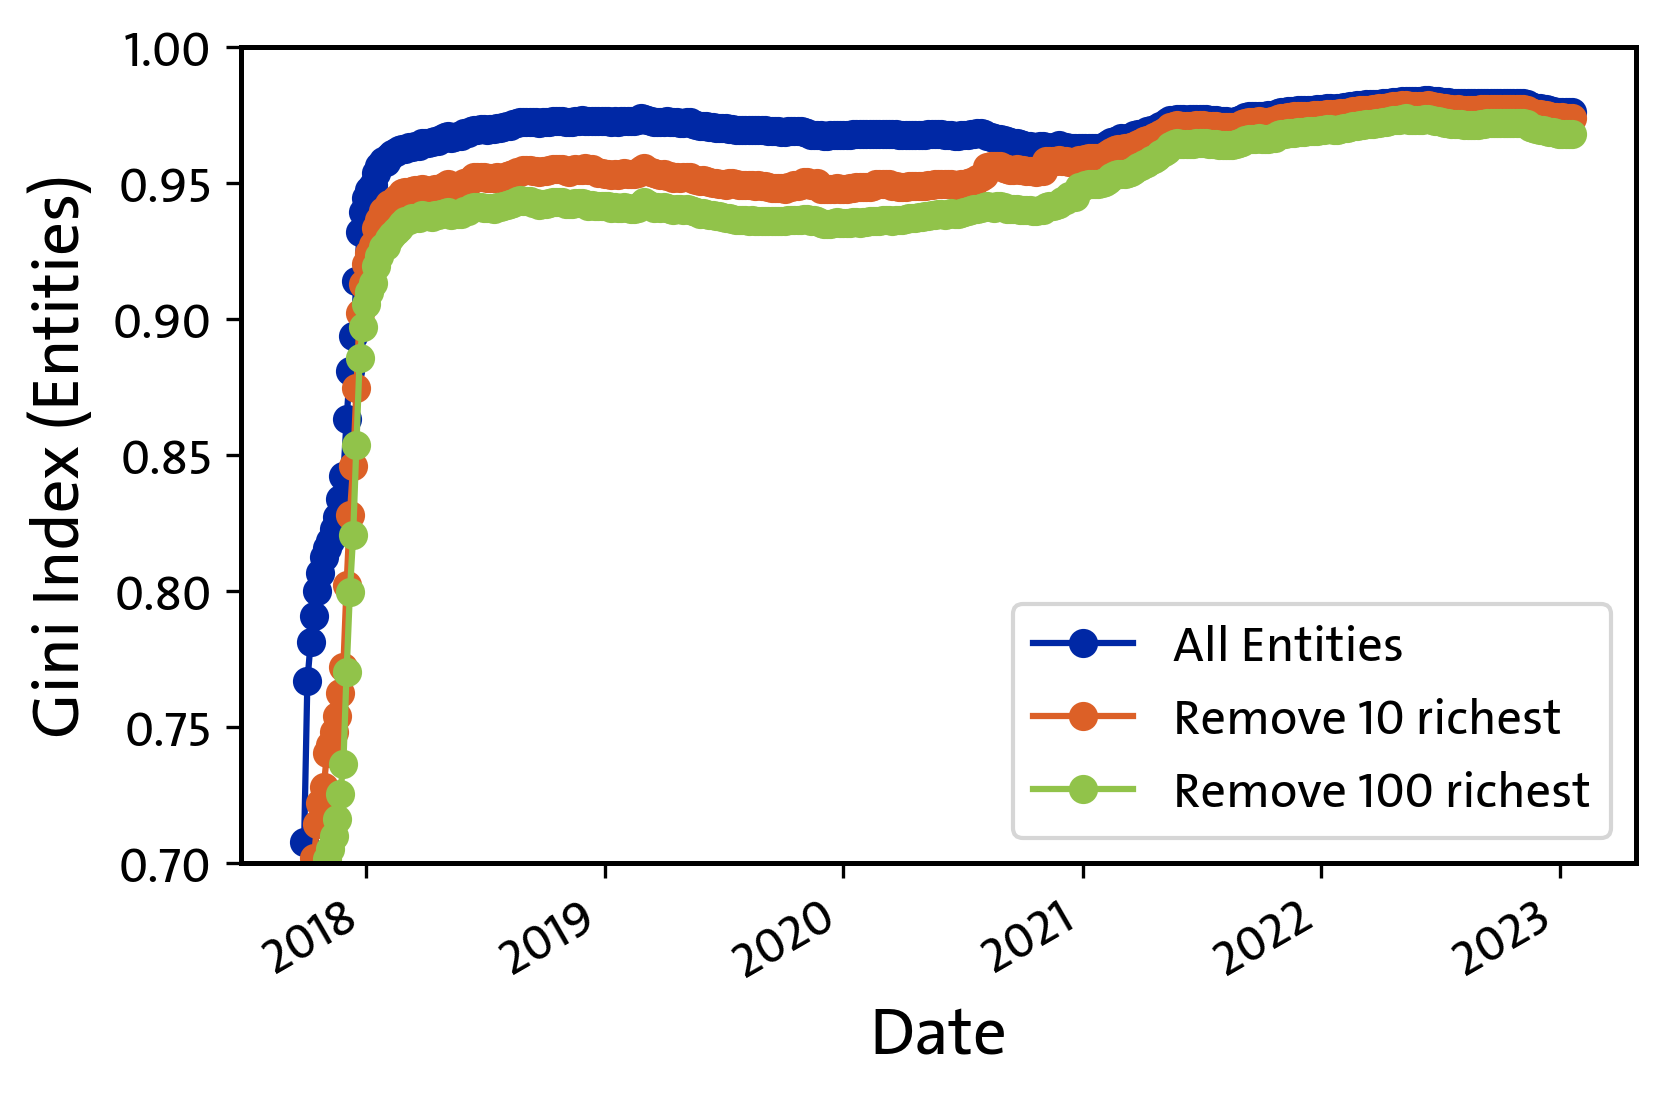

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')


#date_list = [str(INITIAL_DATE_CARDANO + datetime.timedelta(days=i)) for i in range(total_time_length_CARDANO)]
#date_list = pd.to_datetime(date_list)


first_epoch_no = 0
last_epoch_no  = 390
FIRST_DATE_CARDANO = datetime.datetime.strptime('2017-09-23 21:44:51', '%Y-%m-%d %H:%M:%S').date() # epoch_no = 0
LAST_DATE_CARDANO  = datetime.datetime.strptime('2023-01-30 21:46:16', '%Y-%m-%d %H:%M:%S').date() # epoch_no = 391


epochs_array      = list(range(first_epoch_no, last_epoch_no+1))
epochs_date_array = [0]*len(epochs_array)
for i in range(len(epochs_date_array)):
    epochs_date_array[i] = FIRST_DATE_CARDANO + datetime.timedelta(days=(i*5))


date_list = [str(epochs_date_array[i]) for i in range(1,len(epochs_date_array)-1)]
date_list = pd.to_datetime(date_list)

#date_list = epochs_date_array

DF = pd.DataFrame()
DF = pd.DataFrame(gini_index_entityBalances_remove_0[1:last_epoch_no], columns=['value1'])
DF['value2'] = pd.DataFrame(gini_index_entityBalances_remove_10  [1:last_epoch_no])
DF['value3'] = pd.DataFrame(gini_index_entityBalances_remove_100 [1:last_epoch_no])
#DF['value4'] = pd.DataFrame(gini_index_entityBalances_remove_100 [1:last_epoch_no])


DF = DF.set_index(date_list)
plt.plot(DF, marker='o')
plt.gcf().autofmt_xdate()

# Function add a legend 
plt.legend(['All Entities', 'Remove 10 richest', 'Remove 100 richest'], loc ="lower right")


plt.xlabel('Date')
plt.ylabel('Gini Index (Entities)')

# linear", "log", "symlog", "logit
#plt.xscale("linear")
#plt.yscale("log")

#plt.xlim(0, 60)
plt.ylim(0.7, 1)


plt.savefig('fig_giniIndex_entitiesBalances_with_removes.pdf', bbox_inches='tight', facecolor='white')
plt.show()



    

In [11]:
# Load gini arrays after removing the 0/10/100 largest entities:


gini_index_entityBalances_remove_0 = []
# Retrieve the list from the binary file
input_filename = BASE_ADDRESS + '/giniIndexOfEntities_remove_0_perEpoch_Heuristic1noSC__Cardano_TXs_All__2023-10-26_232842.pickle'
with open(input_filename, 'rb') as file:
    gini_index_entityBalances_ = pickle.load(file)
for i in range(len(gini_index_entityBalances_)):
    gini_index_entityBalances_remove_0.append(float(gini_index_entityBalances_[i]))



gini_index_entityBalances_remove_0_large10remove = []
# Retrieve the list from the binary file
input_filename = BASE_ADDRESS + '/giniIndexOfEntities_remove_0_large10remove_perEpoch_Heuristic1noSC__Cardano_TXs_All__2023-10-28_143223.pickle'
with open(input_filename, 'rb') as file:
    gini_index_entityBalances_ = pickle.load(file)
for i in range(len(gini_index_entityBalances_)):
    gini_index_entityBalances_remove_0_large10remove.append(float(gini_index_entityBalances_[i]))



gini_index_entityBalances_remove_0_large100remove = []
# Retrieve the list from the binary file
input_filename = BASE_ADDRESS + '/giniIndexOfEntities_remove_0_large100remove_perEpoch_Heuristic1noSC__Cardano_TXs_All__2023-10-30_072901.pickle'
with open(input_filename, 'rb') as file:
    gini_index_entityBalances_ = pickle.load(file)
for i in range(len(gini_index_entityBalances_)):
    gini_index_entityBalances_remove_0_large100remove.append(float(gini_index_entityBalances_[i]))


##########################################################################################
print('----------------------')
print('done!')


----------------------
done!


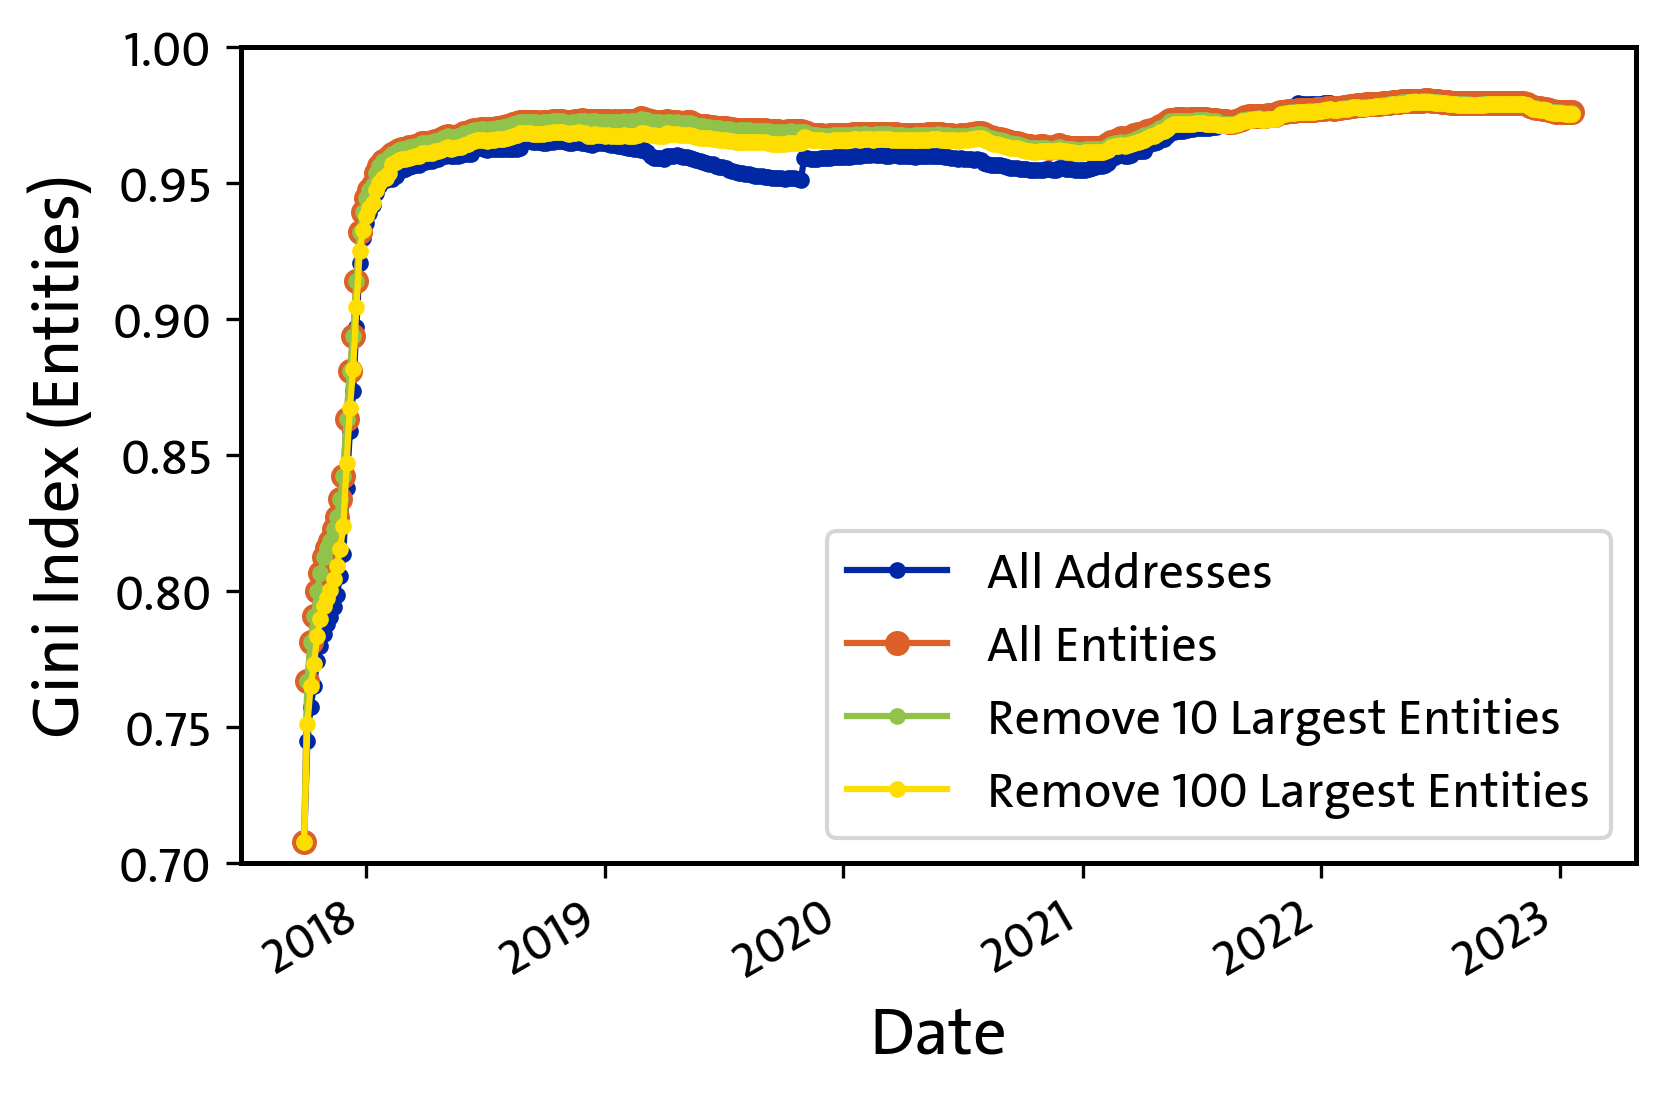

In [17]:
# Plot after removing the 0/10/100 largest entities:


import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')



gini_index_addressBalances_remove_0 = []
# Retrieve the list from the binary file
input_filename = BASE_ADDRESS + '/giniIndexOfAddresses_remove_0_perEpoch_Heuristic1noSC__Cardano_TXs_All__2023-10-30_200442.pickle'
with open(input_filename, 'rb') as file:
    gini_index_entityBalances_ = pickle.load(file)
for i in range(len(gini_index_entityBalances_)):
    gini_index_addressBalances_remove_0.append(float(gini_index_entityBalances_[i]))



#date_list = [str(INITIAL_DATE_CARDANO + datetime.timedelta(days=i)) for i in range(total_time_length_CARDANO)]
#date_list = pd.to_datetime(date_list)


first_epoch_no = 0
last_epoch_no  = 390
FIRST_DATE_CARDANO = datetime.datetime.strptime('2017-09-23 21:44:51', '%Y-%m-%d %H:%M:%S').date() # epoch_no = 0
LAST_DATE_CARDANO  = datetime.datetime.strptime('2023-01-30 21:46:16', '%Y-%m-%d %H:%M:%S').date() # epoch_no = 391


epochs_array      = list(range(first_epoch_no, last_epoch_no+1))
epochs_date_array = [0]*len(epochs_array)
for i in range(len(epochs_date_array)):
    epochs_date_array[i] = FIRST_DATE_CARDANO + datetime.timedelta(days=(i*5))


date_list = [str(epochs_date_array[i]) for i in range(1,len(epochs_date_array)-1)]
date_list = pd.to_datetime(date_list)

#date_list = epochs_date_array


DF = pd.DataFrame()
DF = pd.DataFrame(gini_index_addressBalances_remove_0[1:last_epoch_no], columns=['value1'])
DF['value2'] = pd.DataFrame(gini_index_entityBalances_remove_0  [1:last_epoch_no])
DF['value3'] = pd.DataFrame(gini_index_entityBalances_remove_0_large10remove [1:last_epoch_no])
DF['value4'] = pd.DataFrame(gini_index_entityBalances_remove_0_large100remove [1:last_epoch_no])


DF = DF.set_index(date_list)
#plt.plot(DF, marker='o')
plt.plot(DF['value1'], marker='o', markersize=3)
plt.plot(DF['value2'], marker='o', markersize=5)
plt.plot(DF['value3'], marker='o', markersize=3)
plt.plot(DF['value4'], marker='o', markersize=3)
plt.gcf().autofmt_xdate()

# Function add a legend 
plt.legend(['All Addresses', 'All Entities', 'Remove 10 Largest Entities', 'Remove 100 Largest Entities'], loc ="lower right")


plt.xlabel('Date')
plt.ylabel('Gini Index (Entities)')

# linear", "log", "symlog", "logit
#plt.xscale("linear")
#plt.yscale("log")

#plt.xlim(0, 60)
plt.ylim(0.7, 1)


plt.savefig('fig_giniIndex_Addr_Entity_Balances_with_largeremoves.pdf', bbox_inches='tight', facecolor='white')
plt.show()



    

In [ ]:
# Calculate balances of addresses:


print('----------------------')
import random
import pickle


# ct stores current time
ct = datetime.datetime.now()
print("current time: ", ct)
print('----------------------')



# raw_addresses_new_per_day_array
# Byron_payment_addresses_new_per_day_array
# Shelley_payment_addresses_new_per_day_array
# delegation_addresses_new_per_day_array



INITIAL_DATE_CARDANO      = datetime.datetime.strptime('2017-09-23 21:44:51', '%Y-%m-%d %H:%M:%S').date()
FINAL_DATE_CARDANO        = datetime.datetime.strptime('2023-01-21 17:39:30', '%Y-%m-%d %H:%M:%S').date()
total_time_length_CARDANO = int((FINAL_DATE_CARDANO - INITIAL_DATE_CARDANO).total_seconds()/86400) + 1

# Choose from: "clustering_array_heur1"  OR  "clustering_array_heur2"  OR  "clustering_array_heur1and2"
clustering_array = clustering_array_heur1and2

balances_per_address_array = [0] * ( len(clustering_array) )
current_delta_day = 0



CSV_FILES_NAME_FORMAT = BASE_ADDRESS + '/cardano_TXs_Velocity_'
NUMBER_OF_CSV_FILES = 6
CSV_FILES_SUFFIX = '.csv'


for i in range(1, NUMBER_OF_CSV_FILES + 1):

    ct_temp = datetime.datetime.now()

    file_name = CSV_FILES_NAME_FORMAT + str(i) + CSV_FILES_SUFFIX
    df = pd.read_csv(file_name, delimiter='|')

    et_temp = datetime.datetime.now() - ct_temp
    print("elapsed time (Load CSV File " + file_name + "): ", et_temp)

    ct_temp = datetime.datetime.now()

    for index, row in tqdm(df.iterrows()):
        ##########################################################################################
        TX_ID      = df.loc[index , 'TX_ID']
        ##########################################################################################
        BLOCK_TIME = datetime.datetime.strptime(str(df.loc[index , 'BLOCK_TIME']), '%Y-%m-%d %H:%M:%S').date()
        tx_delta_day = int((BLOCK_TIME - INITIAL_DATE_CARDANO).total_seconds()/86400)
        #if(current_delta_day < tx_delta_day):
        #    output_filename = BASE_ADDRESS + '/YuZhang_Cardano_Balances_Addresses/BalancesPerAddressDay_' + str(current_delta_day).zfill(4) + '__Cardano_TXs_All.txt'
        #    #print('output_filename = ', output_filename)
        #    #pickle.dump(balances_per_address_array, open(output_filename, 'wb'))
        #    store_array_to_file(balances_per_address_array, output_filename)
        #    current_delta_day = tx_delta_day

        ##########################################################################################
        EPOCH_NO   = str( df.loc[index , 'EPOCH_NO'] )

        ##########################################################################################
        inputs_list = list( df.loc[index , 'INPUTs'].split(';') )
        #for tx_input in inputs_list:
        #    address_raw           = tx_input.split(',')[4]
        #    address_has_script    = tx_input.split(',')[7]
        #    payment_cred          = tx_input.split(',')[8]
        #    stake_address         = tx_input.split(',')[9]
        #    input_value           = int(tx_input.split(',')[6])
        #    input_time_str        = tx_input.split(',')[10]
        #    INPUT_TIME            = datetime.datetime.strptime(input_time_str, '%Y-%m-%d %H:%M:%S').date()
        #    INPUT_HOLDING_DAY     = int((BLOCK_TIME - INPUT_TIME).total_seconds()/86400)
        #    
        #    # Generate a random float between 0 and 1
        #    random_float = random.random()
        #    if(random_float <= 1):
        #        hodling_day_array[INPUT_HOLDING_DAY] = hodling_day_array[INPUT_HOLDING_DAY] + input_value

        ##########################################################################################
        outputs_list = list( df.loc[index , 'OUTPUTs'].split(';') )

        #for tx_output in outputs_list:
        #    address_raw        = tx_output.split(',')[1]
        #    address_has_script = tx_output.split(',')[4]
        #    payment_cred       = tx_output.split(',')[5]
        #    stake_address      = tx_output.split(',')[6]
        #    [address_payment_part, address_delegation_part] = extract_payment_delegation_parts(address_raw, payment_cred, stake_address)
        #    if (address_payment_part != '' and address_delegation_part != ''):
        #        indx1 = BinarySearch(unique_delegation_addresses, address_delegation_part)
        #        indx2 = BinarySearch(unique_payment_addresses, address_payment_part)
        #        stake_delegation_array[indx1].append(indx2)

        for i in range(0, len(inputs_list)):
            address_has_script = inputs_list[i].split(',')[7]
            if (address_has_script == 'f'): # non-Smart Contract Address
                address_raw   = inputs_list[i].split(',')[4]
                payment_cred  = inputs_list[i].split(',')[8]
                stake_address = inputs_list[i].split(',')[9]
                [address_payment_part, address_delegation_part] = extract_payment_delegation_parts(address_raw, payment_cred, stake_address)
                if (address_payment_part != ''):
                    addr_indx   = BinarySearch(unique_payment_addresses, address_payment_part)
                    #entity_indx = clustering_array[addr_indx][0]
                    UTXO_value  = int(inputs_list[i].split(',')[6])
                    balances_per_address_array[addr_indx] = balances_per_address_array[addr_indx] - int(UTXO_value)

        for i in range(0, len(outputs_list)):
            address_has_script = outputs_list[i].split(',')[4]
            if (address_has_script == 'f'): # non-Smart Contract Address
                address_raw   = outputs_list[i].split(',')[1]
                payment_cred  = outputs_list[i].split(',')[5]
                stake_address = outputs_list[i].split(',')[6]
                [address_payment_part, address_delegation_part] = extract_payment_delegation_parts(address_raw, payment_cred, stake_address)
                if (address_payment_part != ''):
                    addr_indx   = BinarySearch(unique_payment_addresses, address_payment_part)
                    #entity_indx = clustering_array[addr_indx][0]
                    UTXO_value  = int(outputs_list[i].split(',')[3])
                    balances_per_address_array[addr_indx] = balances_per_address_array[addr_indx] + int(UTXO_value)

        ##########################################################################################

    et_temp = datetime.datetime.now() - ct_temp
    print("elapsed time (Balance Calculation from CSV File " + file_name + "): ", et_temp)



print('----------------------')
et = datetime.datetime.now() - ct
print("Total elapsed time (Balance Calculation): ", et)


print('----------------------')
print('done!')






In [19]:
# Calculate "Gini Index of Addresses":


print('----------------------')
ct = datetime.datetime.now()
curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]

first_epoch_no = 0
last_epoch_no  = 391
total_num_of_epochs = int(last_epoch_no - first_epoch_no + 1)

gini_index_addressBalances_remove_0   = [0]*total_num_of_epochs
gini_index_addressBalances_remove_10  = [0]*total_num_of_epochs
gini_index_addressBalances_remove_100 = [0]*total_num_of_epochs


# Choose from: "clustering_array_heur1"  OR  "clustering_array_heur2"  OR  "clustering_array_heur1and2"
clustering_array = clustering_array_heur1and2



# Store "balances_per_entity_array" into file:
'''
output_filename = BASE_ADDRESS + '/YuZhang_Cardano_Balances_Addresses/BalancesPerAddressDay_' + str(current_delta_day).zfill(4) + '__Cardano_TXs_All.txt'
print('output_filename = ', output_filename)
store_array_to_file(balances_per_address_array, output_filename)
'''



# Load  "balances_per_entity_array" from file:

for i in tqdm(range(0, 1945+1, 5)):
    file_name = BASE_ADDRESS + '/YuZhang_Cardano_Balances_Addresses/BalancesPerAddressDay_' + str(i).zfill(4) + '__Cardano_TXs_All.txt'
    balances_per_address_ = load_file_to_array(file_name)
    balances_per_address_ = [x for x in balances_per_address_ if x != 0] # remove zeros
    #balances_per_address_.sort(reverse=True)
    balances_per_address_remove_0_   = balances_per_address_[0:]   # Remove the top n maximum values
    #balances_per_address_remove_10_  = balances_per_address_[10:]  # Remove the top n maximum values
    #balances_per_address_remove_100_ = balances_per_address_[100:] # Remove the top n maximum values

    balances_per_address_remove_0 = []
    for j in range(len(balances_per_address_remove_0_)):
        balances_per_address_remove_0.append(int(balances_per_address_remove_0_[j]))

    #balances_per_address_remove_10 = []
    #for j in range(len(balances_per_address_remove_10_)):
    #    balances_per_address_remove_10.append(int(balances_per_address_remove_10_[j]))

    #balances_per_address_remove_100 = []
    #for j in range(len(balances_per_address_remove_100_)):
    #    balances_per_address_remove_100.append(int(balances_per_address_remove_100_[j]))

    epoch_no = int(i/5)
    if(epoch_no < len(gini_index_addressBalances_remove_0)):
        gini_index_addressBalances_remove_0   [epoch_no] = Gini_rank(balances_per_address_remove_0)

    #if(epoch_no < len(gini_index_addressBalances_remove_10)):
    #    gini_index_addressBalances_remove_10  [epoch_no] = Gini_rank(balances_per_address_remove_10)

    #if(epoch_no < len(gini_index_addressBalances_remove_100)):
    #    gini_index_addressBalances_remove_100 [epoch_no] = Gini_rank(balances_per_address_remove_100)



##########################################################################################
print('----------------------')
print('done!')




----------------------


NameError: name 'clustering_array_heur1and2' is not defined

In [ ]:
# Store/Load "gini_index_addressBalances" into/from file:


ct = datetime.datetime.now()
curr_timestamp = str(ct)[0:10] + '_' + str(ct)[11:13] + str(ct)[14:16] + str(ct)[17:19]


output_filename = BASE_ADDRESS + '/giniIndexOfAddresses_remove_0_perEpoch_Heuristic1noSC__Cardano_TXs_All__' + curr_timestamp + '.pickle'
print('output_filename = ', output_filename)
#store_array_to_file(gini_index_addressBalances, output_filename)
with open(output_filename, 'wb') as file:
    pickle.dump(gini_index_addressBalances_remove_0, file)

'''
output_filename = BASE_ADDRESS + '/giniIndexOfAddresses_remove_10_perEpoch_Heuristic1noSC__Cardano_TXs_All__' + curr_timestamp + '.pickle'
print('output_filename = ', output_filename)
#store_array_to_file(gini_index_addressBalances, output_filename)
with open(output_filename, 'wb') as file:
    pickle.dump(gini_index_entityBalances_remove_10, file)

output_filename = BASE_ADDRESS + '/giniIndexOfAddresses_remove_100_perEpoch_Heuristic1noSC__Cardano_TXs_All__' + curr_timestamp + '.pickle'
print('output_filename = ', output_filename)
#store_array_to_file(gini_index_addressBalances, output_filename)
with open(output_filename, 'wb') as file:
    pickle.dump(gini_index_entityBalances_remove_100, file)
'''





'''
gini_index_entityBalances_remove_0 = []
# Retrieve the list from the binary file
input_filename = BASE_ADDRESS + '/giniIndexOfAddresses_remove_0_perEpoch_Heuristic1noSC__Cardano_TXs_All__2023-10-26_232842.pickle'
with open(input_filename, 'rb') as file:
    gini_index_entityBalances_ = pickle.load(file)
for i in range(len(gini_index_entityBalances_)):
    gini_index_entityBalances_remove_0.append(float(gini_index_entityBalances_[i]))
'''

'''
gini_index_entityBalances_remove_10 = []
# Retrieve the list from the binary file
input_filename = BASE_ADDRESS + '/giniIndexOfAddresses_remove_10_perEpoch_Heuristic1noSC__Cardano_TXs_All__2023-10-26_232842.pickle'
with open(input_filename, 'rb') as file:
    gini_index_entityBalances_ = pickle.load(file)
for i in range(len(gini_index_entityBalances_)):
    gini_index_entityBalances_remove_10.append(float(gini_index_entityBalances_[i]))


gini_index_entityBalances_remove_100 = []
# Retrieve the list from the binary file
input_filename = BASE_ADDRESS + '/giniIndexOfAddresses_remove_100_perEpoch_Heuristic1noSC__Cardano_TXs_All__2023-10-26_232842.pickle'
with open(input_filename, 'rb') as file:
    gini_index_entityBalances_ = pickle.load(file)
for i in range(len(gini_index_entityBalances_)):
    gini_index_entityBalances_remove_100.append(float(gini_index_entityBalances_[i]))
'''

##########################################################################################
print('----------------------')
print('done!')



In [13]:
gini_array = [0.0]

file_name = BASE_ADDRESS + '/giniArray_noZeros__paymentAddresses_noSC__Cardano_TXs_All__2023-03-17_155124.txt'
with open(file_name, 'r') as filehandle:
    for line in filehandle:
        curr_place = line[:-1]
        gini_array.append(float(curr_place))



time_date_array = []
time_date_array.append(datetime.datetime.strptime('2017-09-23 21:44:51', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2017-12-29 14:35:51', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2018-03-02 08:06:51', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2018-05-24 23:26:51', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2018-10-13 04:50:31', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2019-03-05 03:05:11', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2019-05-17 12:33:51', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2019-07-17 05:53:31', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2019-11-04 06:50:11', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2020-02-13 14:39:31', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2020-04-25 04:25:31', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2020-06-13 16:33:51', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2020-07-26 19:35:51', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2020-08-24 14:22:42', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2020-10-05 08:08:36', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2020-11-20 20:35:24', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2020-12-15 18:55:35', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-01-06 12:21:47', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-01-19 23:25:18', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-02-03 20:28:11', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-02-10 19:34:15', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-02-17 00:23:44', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-02-22 15:19:36', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-02-27 21:29:13', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-03-05 23:20:18', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-03-12 23:38:58', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-03-18 18:41:46', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-03-24 21:08:35', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-03-31 08:08:59', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-04-05 21:01:01', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-04-11 14:43:08', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-04-16 09:48:18', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-04-21 01:37:08', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-04-26 06:21:12', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-05-01 15:41:55', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-05-06 00:36:29', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-05-09 17:31:50', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-05-13 14:15:18', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-05-16 07:25:26', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-05-19 12:47:14', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-05-23 03:49:56', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-05-27 06:12:08', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-06-01 10:19:30', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-06-06 14:00:08', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-06-12 16:05:44', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-06-20 04:19:18', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-06-26 23:21:05', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-07-04 13:12:27', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-07-11 11:02:48', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-07-18 21:23:28', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-07-26 09:14:05', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-08-02 15:34:37', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-08-09 01:38:53', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-08-13 15:00:23', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-08-17 10:07:51', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-08-20 22:51:14', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-08-24 01:13:02', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-08-26 23:03:27', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-08-29 12:46:32', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-09-01 02:31:27', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-09-03 13:17:43', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-09-05 22:28:48', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-09-07 16:45:12', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-09-09 13:23:49', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-09-11 13:36:03', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-09-13 19:54:50', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-09-16 09:54:42', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-09-18 10:27:55', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-09-20 12:31:03', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-09-23 10:13:03', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-09-25 13:16:50', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-09-27 17:53:43', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-09-29 20:47:20', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-10-01 23:36:47', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-10-04 15:34:20', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-10-06 19:44:42', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-10-09 12:22:53', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-10-12 07:38:40', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-10-15 00:37:05', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-10-17 21:38:49', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-10-20 22:29:10', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-10-23 15:15:50', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-10-25 17:56:11', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-10-27 19:24:02', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-10-29 13:45:29', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-10-30 17:34:50', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-11-01 18:33:54', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-11-04 09:48:20', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-11-06 20:24:40', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-11-09 02:00:27', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-11-11 09:46:36', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-11-12 22:55:30', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-11-13 21:24:32', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-11-14 19:01:51', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-11-15 12:06:17', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-11-16 11:50:44', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-11-17 19:13:20', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-11-19 19:28:42', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-11-21 22:44:42', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-11-22 05:37:06', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-11-22 14:45:30', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-11-23 05:38:05', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-11-23 23:17:46', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-11-24 21:10:14', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-11-25 16:49:47', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-11-26 10:09:43', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-11-27 03:56:59', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-11-28 10:07:27', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-11-29 19:43:19', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-12-01 00:48:27', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-12-02 16:03:01', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-12-04 15:23:00', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-12-06 13:17:28', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-12-08 01:57:45', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-12-09 18:18:51', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-12-11 09:58:25', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-12-13 17:09:02', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-12-15 22:17:57', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-12-18 02:43:45', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-12-19 22:59:44', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-12-21 17:18:48', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-12-23 10:02:36', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-12-25 15:56:37', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-12-27 20:54:41', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2021-12-30 02:29:03', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-01-01 10:05:21', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-01-03 14:22:59', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-01-05 11:46:25', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-01-06 20:16:59', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-01-08 09:11:25', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-01-09 22:39:27', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-01-11 17:24:14', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-01-13 10:45:35', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-01-15 00:12:22', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-01-16 03:55:03', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-01-17 08:06:40', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-01-18 12:37:13', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-01-19 16:02:49', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-01-20 15:11:52', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-01-21 15:04:50', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-01-22 17:30:04', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-01-23 22:38:19', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-01-25 06:59:08', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-01-26 13:30:32', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-01-27 19:23:44', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-01-29 05:02:00', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-01-30 14:46:45', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-01-31 20:52:59', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-02-02 13:05:11', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-02-04 01:37:23', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-02-05 13:53:14', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-02-06 20:31:18', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-02-07 19:49:07', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-02-09 09:26:41', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-02-10 21:52:35', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-02-12 13:53:07', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-02-14 08:38:42', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-02-15 16:23:13', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-02-17 05:01:34', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-02-18 22:56:18', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-02-20 07:22:42', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-02-21 21:21:27', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-02-23 14:52:03', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-02-25 09:24:27', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-02-27 02:36:36', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-02-28 21:46:05', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-03-02 14:19:24', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-03-04 10:49:03', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-03-06 08:02:27', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-03-08 05:29:51', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-03-10 10:52:06', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-03-12 16:08:00', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-03-14 10:31:10', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-03-15 22:34:08', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-03-17 14:44:47', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-03-19 08:11:56', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-03-21 02:58:57', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-03-22 21:36:15', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-03-24 18:50:48', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-03-26 15:52:17', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-03-28 11:38:30', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-03-30 05:48:30', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-04-01 02:01:51', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-04-02 22:43:47', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-04-05 00:51:51', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-04-07 02:18:20', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-04-09 12:27:06', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-04-11 10:32:14', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-04-13 01:07:18', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-04-14 21:39:38', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-04-16 15:12:57', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-04-18 10:06:19', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-04-20 03:27:47', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-04-21 21:30:33', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-04-23 20:53:38', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-04-25 21:19:25', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-04-27 16:26:40', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-04-29 03:05:21', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-05-01 00:14:25', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-05-02 19:19:23', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-05-04 20:00:56', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-05-06 17:06:22', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-05-08 15:59:25', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-05-10 23:08:56', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-05-12 19:21:33', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-05-14 16:51:02', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-05-16 08:42:49', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-05-18 04:21:35', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-05-20 16:41:38', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-05-22 22:30:54', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-05-25 11:15:52', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-05-27 06:31:32', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-05-29 13:25:52', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-05-31 13:23:55', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-06-02 20:44:20', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-06-04 20:07:36', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-06-06 20:00:10', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-06-09 00:22:05', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-06-11 12:09:21', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-06-13 22:28:45', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-06-16 15:14:18', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-06-19 19:47:29', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-06-22 23:08:46', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-06-25 20:12:11', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-06-28 17:48:33', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-07-01 14:29:15', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-07-04 14:59:48', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-07-07 07:58:01', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-07-09 20:48:06', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-07-12 22:06:40', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-07-15 16:01:08', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-07-18 03:23:25', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-07-20 15:45:13', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-07-23 02:14:33', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-07-25 20:40:08', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-07-28 21:46:00', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-07-31 14:18:50', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-08-02 23:48:43', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-08-05 04:17:25', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-08-08 11:27:31', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-08-11 02:56:03', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-08-14 06:35:13', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-08-17 03:09:13', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-08-19 22:36:37', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-08-22 18:37:07', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-08-25 21:08:53', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-08-28 21:56:05', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-08-31 20:24:38', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-09-04 00:31:24', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-09-07 00:00:05', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-09-09 21:59:03', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-09-13 12:30:46', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-09-17 04:31:02', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-09-20 15:07:00', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-09-23 12:52:09', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-09-26 22:41:14', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-09-29 19:41:24', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-10-02 18:05:18', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-10-05 16:26:14', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-10-08 18:21:37', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-10-11 23:53:11', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-10-14 11:04:23', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-10-17 06:25:12', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-10-19 09:52:18', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-10-21 14:35:46', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-10-23 13:44:00', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-10-25 16:15:48', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-10-27 13:50:56', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-10-29 15:03:38', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-10-31 21:03:56', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-11-03 03:55:27', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-11-05 15:37:40', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-11-08 00:42:05', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-11-10 21:54:34', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-11-13 15:29:11', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-11-16 05:17:13', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-11-18 21:46:07', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-11-21 13:00:29', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-11-23 12:39:41', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-11-25 21:44:50', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-11-28 13:32:45', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-12-01 14:13:28', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-12-04 07:25:06', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-12-07 04:06:56', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-12-10 02:26:53', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-12-12 19:54:58', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-12-15 02:51:27', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-12-17 14:12:35', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-12-20 15:06:39', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-12-22 22:34:17', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-12-26 08:34:11', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2022-12-29 09:29:28', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2023-01-01 07:52:23', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2023-01-03 23:45:04', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2023-01-06 14:44:41', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2023-01-08 20:41:19', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2023-01-11 03:02:20', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2023-01-13 16:36:45', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2023-01-16 05:00:29', '%Y-%m-%d %H:%M:%S'))
time_date_array.append(datetime.datetime.strptime('2023-01-18 23:32:58', '%Y-%m-%d %H:%M:%S'))


##########################################################################################
print('----------------------')
print('done!')






----------------------
done!


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')


#date_list = [str(INITIAL_DATE_CARDANO + datetime.timedelta(days=i)) for i in range(total_time_length_CARDANO)]
#date_list = pd.to_datetime(date_list)


first_epoch_no = 0
last_epoch_no  = 300
#FIRST_DATE_CARDANO = datetime.datetime.strptime('2017-09-23 21:44:51', '%Y-%m-%d %H:%M:%S').date() # epoch_no = 0
#LAST_DATE_CARDANO  = datetime.datetime.strptime('2023-01-30 21:46:16', '%Y-%m-%d %H:%M:%S').date() # epoch_no = 391


#epochs_array      = list(range(first_epoch_no, last_epoch_no+1))
#epochs_date_array = [0]*len(epochs_array)
#for i in range(len(epochs_date_array)):
#    epochs_date_array[i] = FIRST_DATE_CARDANO + datetime.timedelta(days=(i*5))


date_list = [str(time_date_array[i]) for i in range(1,len(time_date_array)-1)]
date_list = pd.to_datetime(time_date_array)

#date_list = epochs_date_array

DF = pd.DataFrame()
DF = pd.DataFrame(gini_array[1:last_epoch_no], columns=['value1'])
#DF = pd.DataFrame(gini_index_entityBalances[1:last_epoch_no-first_epoch_no], columns=['value1'])
#DF['value2'] = pd.DataFrame(gini_index_rewardOverRewardedPools_per_epoch[1:last_epoch_no-first_epoch_no])
#DF['value3'] = pd.DataFrame(count_cumulative_rewarded_pools_per_epoch)
#DF['value4'] = pd.DataFrame(count_rewarded_pools_per_epoch)


DF = DF.set_index(date_list[1:])
plt.plot(DF, marker='o')
plt.gcf().autofmt_xdate()

# Function add a legend 
#plt.legend(['Stake Periodic', 'Reward Periodic'], fontsize="8", loc ="lower left")


plt.xlabel('Date')
plt.ylabel('Gini Index (Addresses)')

# linear", "log", "symlog", "logit
#plt.xscale("linear")
#plt.yscale("log")

#plt.xlim(0, 60)
plt.ylim(0.7, 1)


plt.savefig('fig_giniIndex_addressBalances.pdf', bbox_inches='tight', facecolor='white')
plt.show()



    

NameError: name 'time_date_array' is not defined